# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_df = pd.read_csv('dataset/new_lending_club_loans.csv')

In [3]:
data_description = pd.read_csv('dataset/LCDataDictionary.csv')

In [4]:
pd.set_option("display.max_colwidth",-1)

In [5]:
for i in range(data_description.shape[0]):
    if data_description.loc[i]['LoanStatNew'] not in loan_df:
        data_description.drop(index=i, inplace=True)

In [6]:
data_description.reset_index(drop=True, inplace=True)

In [7]:
data_description

LoanStatNew  \
0   acc_now_delinq            
1   addr_state                
2   annual_inc                
3   application_type          
4   collection_recovery_fee   
5   delinq_2yrs               
6   delinq_amnt               
7   dti                       
8   emp_title                 
9   fico_range_high           
10  fico_range_low            
11  funded_amnt               
12  funded_amnt_inv           
13  grade                     
14  home_ownership            
15  id                        
16  initial_list_status       
17  inq_last_6mths            
18  installment               
19  issue_d                   
20  last_credit_pull_d        
21  last_fico_range_high      
22  last_fico_range_low       
23  last_pymnt_amnt           
24  last_pymnt_d              
25  loan_amnt                 
26  loan_status               
27  member_id                 
28  open_acc                  
29  out_prncp                 
30  out_prncp_inv             
31  policy_code               
32  pub_rec                   
33  pub_rec_bankruptcies      
34  purpose                   
35  pymnt_plan                
36  recoveries                
37  revol_bal                 
38  sub_grade                 
39  title                     
40  total_acc                 
41  total_pymnt               
42  total_pymnt_inv           
43  total_rec_int             
44  total_rec_late_fee        
45  total_rec_prncp           
46  verification_status       
47  zip_code                  

                                                                                                                                                                                                 Description  
0   The number of accounts on which the borrower is now delinquent.                                                                                                                                           
1   The state provided by the borrower in the loan application                                                                                                                                                
2   The self-reported annual income provided by the borrower during registration.                                                                                                                             
3   Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                      
4   post charge off collection fee                                                                                                                                                                            
5   The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                                                                              
6   The past-due amount owed for the accounts on which the borrower is now delinquent.                                                                                                                        
7   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
8   The job title supplied by the Borrower when applying for the loan.*                                                                                                                                       
9   The upper boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                              
10  The lower boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                              
11  The tota

In [8]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1077501  1296599    5000.0     5000.0       4975.0           162.87        
1  1077430  1314167    2500.0     2500.0       2500.0           59.83         
2  1077175  1313524    2400.0     2400.0       2400.0           84.33         
3  1076863  1277178    10000.0    10000.0      10000.0          339.31        
4  1075358  1311748    3000.0     3000.0       3000.0           67.79         

  grade sub_grade                 emp_title home_ownership  ...  \
0  B     B2        Other                     RENT           ...   
1  C     C4        Ryder                     RENT           ...   
2  C     C5        Other                     RENT           ...   
3  C     C1        AIR RESOURCES BOARD       RENT           ...   
4  B     B5        University Medical Group  RENT           ...   

   last_fico_range_low policy_code application_type acc_now_delinq  \
0  740.0                1.0         INDIVIDUAL       0.0             
1  0.0                  1.0         INDIVIDUAL       0.0             
2  715.0                1.0         INDIVIDUAL       0.0             
3  600.0                1.0         INDIVIDUAL       0.0             
4  690.0                1.0         INDIVIDUAL       0.0             

  delinq_amnt pub_rec_bankruptcies term_months int_rate_% emp_length_year  \
0  0.0         0.0                  36          10.65      10               
1  0.0         0.0                  60          15.27      0                
2  0.0         0.0                  36          15.96      10               
3  0.0         0.0                  36          13.49      10               
4  0.0         0.0                  60          12.69      1                

   revol_util_%  
0  83.7          
1  9.4           
2  98.5          
3  21.0          
4  53.9          

[5 rows x 52 columns]

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42420 entries, 0 to 42419
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       42420 non-null  int64  
 1   member_id                42420 non-null  int64  
 2   loan_amnt                42420 non-null  float64
 3   funded_amnt              42420 non-null  float64
 4   funded_amnt_inv          42420 non-null  float64
 5   installment              42420 non-null  float64
 6   grade                    42420 non-null  object 
 7   sub_grade                42420 non-null  object 
 8   emp_title                42420 non-null  object 
 9   home_ownership           42420 non-null  object 
 10  annual_inc               42420 non-null  float64
 11  verification_status      42420 non-null  object 
 12  issue_d                  42420 non-null  object 
 13  loan_status              42420 non-null  object 
 14  pymnt_plan            

In [10]:
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  4.242000e+04  4.242000e+04  42420.000000  42420.000000   
mean   6.650476e+05  8.262932e+05  11100.622348  10831.808699   
std    2.188512e+05  2.789670e+05  7409.234126   7144.781810    
min    5.473400e+04  7.069400e+04  500.000000    500.000000     
25%    4.987715e+05  6.391245e+05  5200.000000   5075.000000    
50%    6.445045e+05  8.244245e+05  9775.000000   9600.000000    
75%    8.259598e+05  1.034200e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count  42420.000000     42420.000000  4.242000e+04  42420.000000   
mean   10152.617744     322.899562    6.916992e+04  13.380188      
std    7129.781409      208.855377    6.413422e+04  6.724445       
min    0.000000         15.670000     1.896000e+03  0.000000       
25%    4950.000000      165.740000    4.000000e+04  8.210000       
50%    8500.000000      278.150000    5.900000e+04  13.480000      
75%    14000.000000     428.592500    8.250000e+04  18.690000      
max    35000.000000     1305.190000   6.000000e+06  29.990000      

        delinq_2yrs  fico_range_low  ...  last_fico_range_high  \
count  42420.000000  42420.000000    ...  42420.000000           
mean   0.152263      713.073432      ...  689.584323             
std    0.511900      36.181801       ...  79.781562              
min    0.000000      610.000000      ...  0.000000               
25%    0.000000      685.000000      ...  644.000000             
50%    0.000000      710.000000      ...  699.000000             
75%    0.000000      740.000000      ...  744.000000             
max    13.000000     825.000000      ...  850.000000             

       last_fico_range_low  policy_code  acc_now_delinq   delinq_amnt  \
count  42420.000000         42420.0      42420.000000    42420.000000   
mean   676.858911           1.0          0.000094        0.143329       
std    118.034955           0.0          0.009710        29.389325      
min    0.000000             1.0          0.000000        0.000000       
25%    640.000000           1.0          0.000000        0.000000       
50%    695.000000           1.0          0.000000        0.000000       
75%    740.000000           1.0          0.000000        0.000000       
max    845.000000           1.0          1.000000        6053.000000    

       pub_rec_bankruptcies   term_months    int_rate_%  emp_length_year  \
count  42420.000000          42420.000000  42420.000000  42420.000000      
mean   0.043729              42.213861     12.163146     4.798373          
std    0.205415              10.513002     3.708374      3.607687          
min    0.000000              36.000000     5.420000      0.000000          
25%    0.000000              36.000000     9.630000      2.000000          
50%    0.000000              36.000000     11.990000     4.000000          
75%    0.000000              60.000000     14.720000     9.000000          
max    2.000000              60.000000     24.590000     10.000000         

       revol_util_%  
count  42420.000000  
mean   49.049401     
std    28.400152     
min    0.000000      
25%    25.600000     
50%    49.600000     
75%    72.600000     
max    119.000000    

[8 rows x 36 columns]

## Checking Duplicate IDs

In [11]:
loan_df['id'].duplicated().sum()

0

In [12]:
loan_df['member_id'].duplicated().sum()

0

In [13]:
sns.set_context('talk')
sns.set_style('ticks')

## Top Titles for Loan

In [14]:
loan_title = loan_df.groupby('title')['loan_amnt'].mean().sort_values(ascending=False).reset_index()[:10]

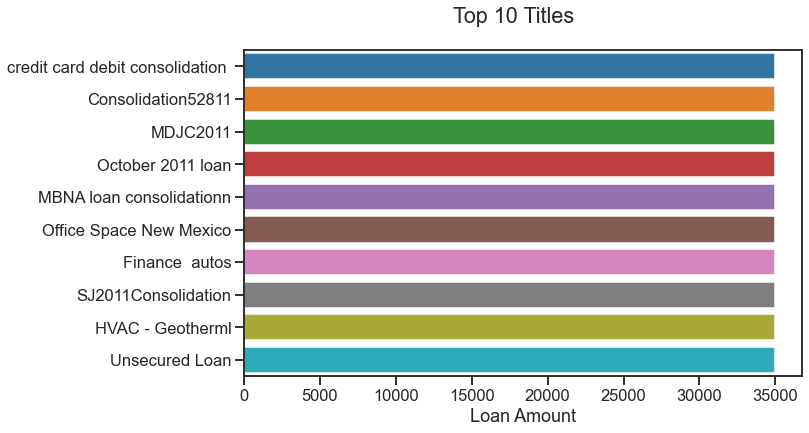

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(y='title',x='loan_amnt',data=loan_title)
plt.suptitle("Top 10 Titles")
plt.xlabel('Loan Amount')
plt.ylabel('')
plt.show()

## Top 10 Title of Income

In [16]:
income_title = loan_df.groupby('title')['annual_inc'].mean().sort_values(ascending=False).reset_index()[:10]

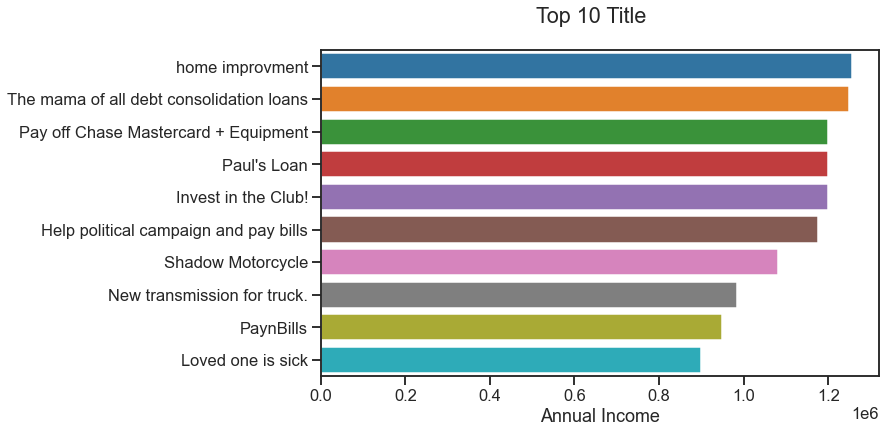

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(y='title',x='annual_inc',data=income_title)
plt.suptitle("Top 10 Title")
plt.xlabel('Annual Income')
plt.ylabel('')
plt.show()

## Top 10 Employee for Loan

In [18]:
loan_employee = loan_df.groupby('emp_title')['loan_amnt'].mean().sort_values(ascending=False).reset_index()[:10]

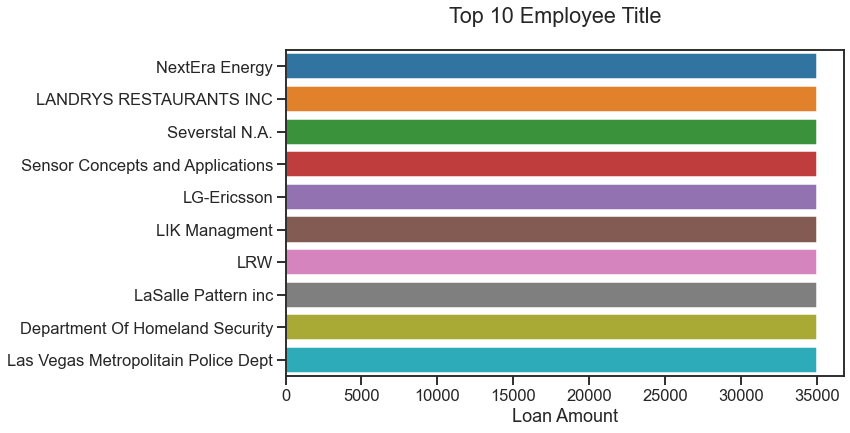

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(y='emp_title',x='loan_amnt',data=loan_employee)
plt.suptitle("Top 10 Employee Title")
plt.xlabel('Loan Amount')
plt.ylabel('')
plt.show()

## Top 10 Employee of Income

In [20]:
income_employee = loan_df.groupby('emp_title')['annual_inc'].mean().sort_values(ascending=False).reset_index()[:10]

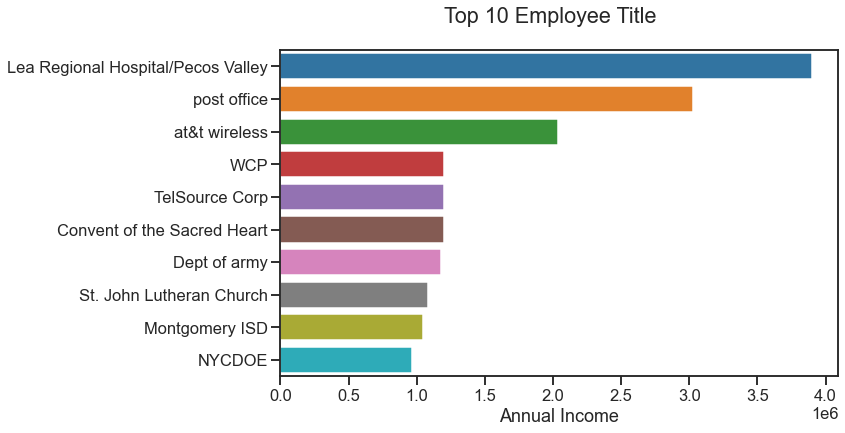

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(y='emp_title',x='annual_inc',data=income_employee)
plt.suptitle("Top 10 Employee Title")
plt.xlabel('Annual Income')
plt.ylabel('')
plt.show()

## Purpose for Loan Request

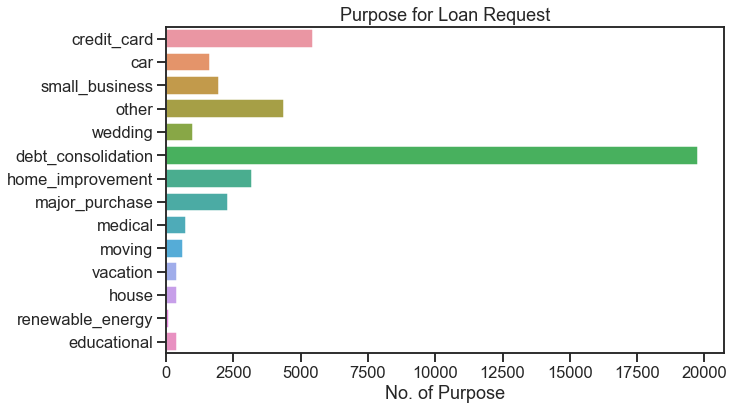

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y='purpose', data=loan_df)
plt.title("Purpose for Loan Request")
plt.xlabel('No. of Purpose')
plt.ylabel('')
plt.show()

## Loan Status

In [23]:
loan_df['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                                'Does not meet the credit policy. Status:Charged Off':'Charged Off',
                                'Late (31-120 days)':'Late',
                                'Late (16-30 days)':'Late'},
                               inplace=True)

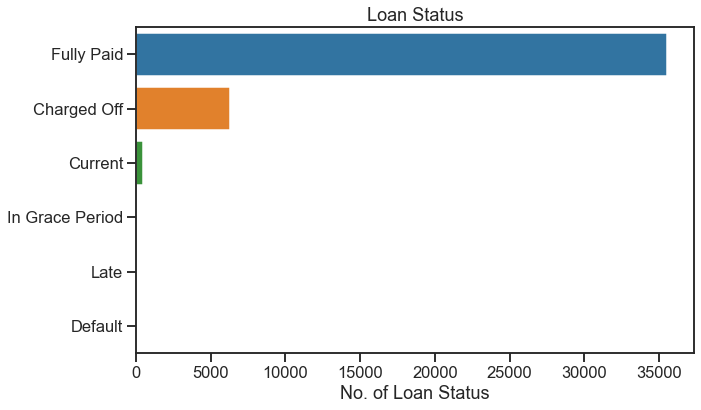

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y='loan_status', data=loan_df)
plt.title("Loan Status")
plt.xlabel('No. of Loan Status')
plt.ylabel('')
plt.show()

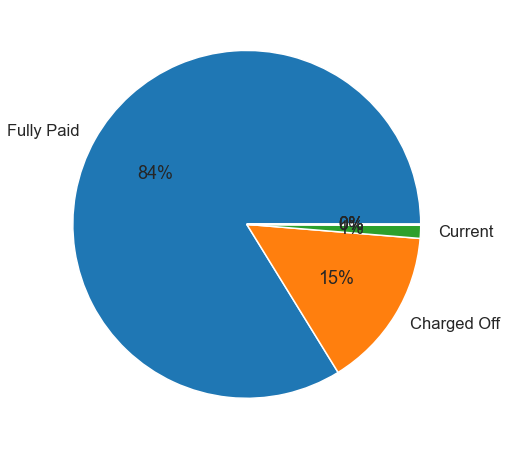

In [25]:
plt.figure(figsize=(12,8))
plt.pie(loan_df['loan_status'].value_counts(),
        autopct='%.0f%%',
        labels=['Fully Paid','Charged Off','Current','','',''])
plt.show()

## Verification Status

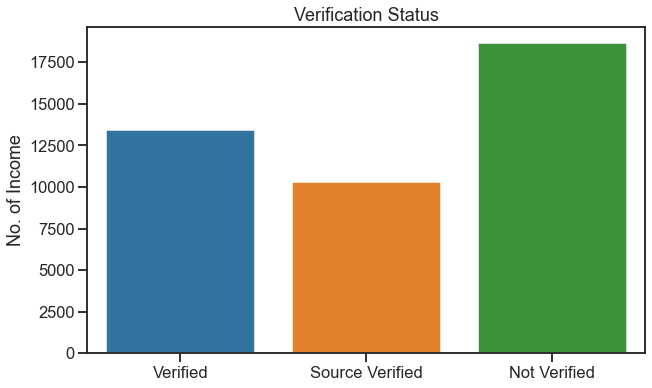

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='verification_status', data=loan_df)
plt.title("Verification Status")
plt.xlabel('')
plt.ylabel('No. of Income')
plt.show()

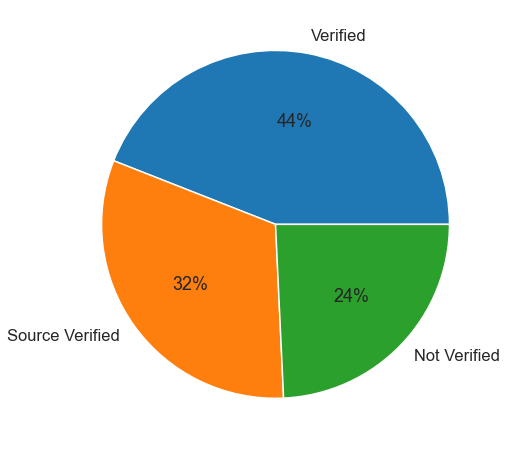

In [27]:
plt.figure(figsize=(12,8))
plt.pie(loan_df['verification_status'].value_counts(),
        autopct='%.0f%%',
        labels=['Verified','Source Verified','Not Verified'])
plt.show()

## Employment Length in Years

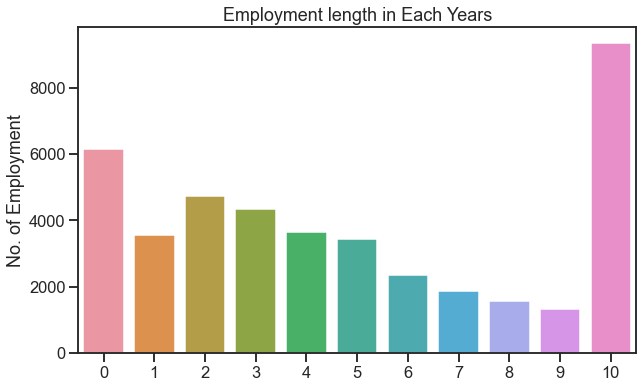

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length_year', data=loan_df)
plt.title("Employment length in Each Years")
plt.xlabel('')
plt.ylabel('No. of Employment')
plt.show()

## LC Assigned Loan Grade

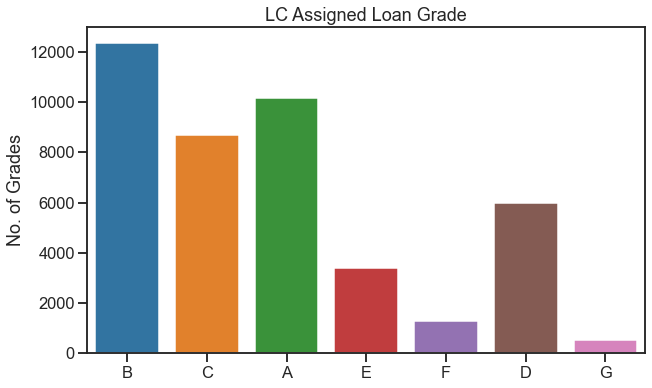

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', data=loan_df)
plt.title("LC Assigned Loan Grade")
plt.xlabel('')
plt.ylabel('No. of Grades')
plt.show()

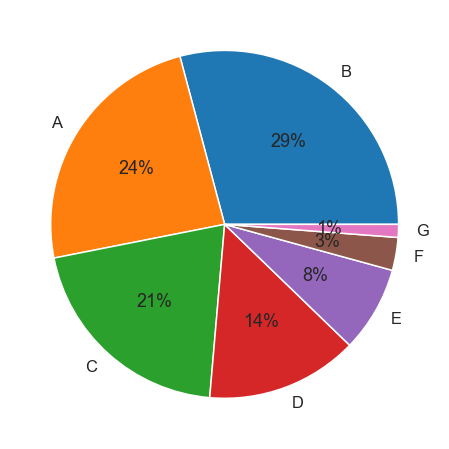

In [30]:
plt.figure(figsize=(12,8))
plt.pie(loan_df['grade'].value_counts(),
        autopct='%.0f%%',
        labels=['B','A','C','D','E','F','G'])
plt.show()

## Home Ownership

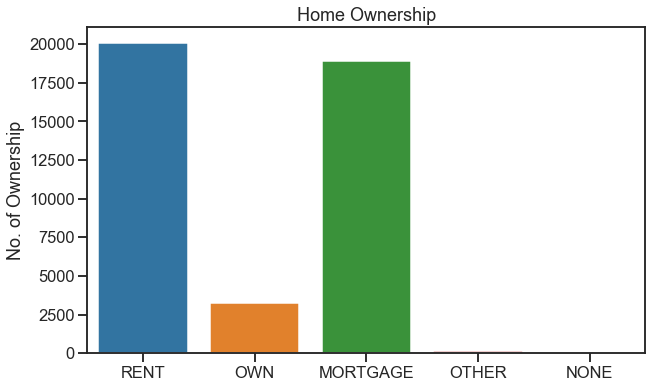

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership', data=loan_df)
plt.title("Home Ownership")
plt.xlabel('')
plt.ylabel('No. of Ownership')
plt.show()

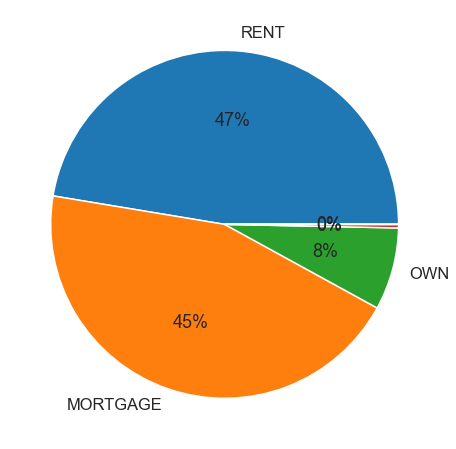

In [32]:
plt.figure(figsize=(12,8))
plt.pie(loan_df['home_ownership'].value_counts(),
        autopct='%.0f%%',
        labels=['RENT','MORTGAGE','OWN','',''])
plt.show()

## Payment Term Months

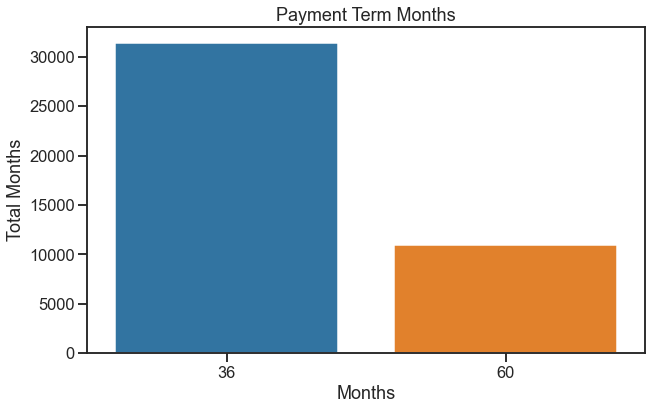

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='term_months', data=loan_df)
plt.title("Payment Term Months")
plt.xlabel('Months')
plt.ylabel('Total Months')
plt.show()

## Annual Income

In [34]:
max_income = loan_df['annual_inc'].max()
min_income = loan_df['annual_inc'].min()
avg_income = loan_df['annual_inc'].mean()

print('Maximum Income Ammount :',max_income)
print('Minimum Income Ammount :',min_income)
print('Average Income Ammount :',avg_income)

Maximum Income Ammount : 6000000.0
Minimum Income Ammount : 1896.0
Average Income Ammount : 69169.9243477134


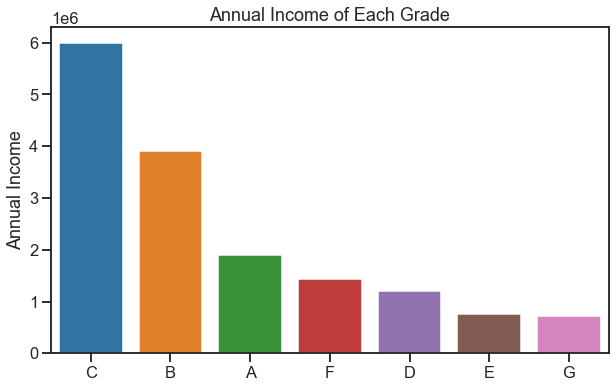

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='annual_inc', data=loan_df.groupby('grade')['annual_inc'].max().sort_values(ascending=False).reset_index())
plt.title('Annual Income of Each Grade')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

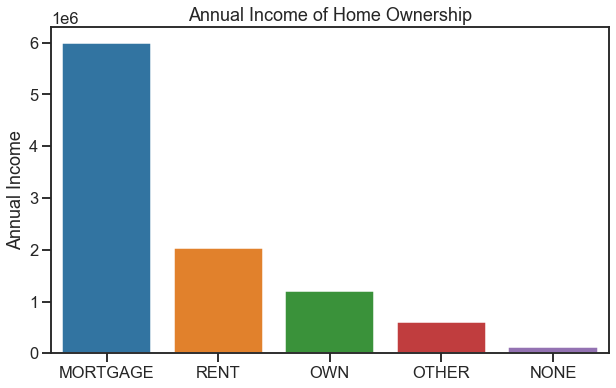

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='annual_inc', data=loan_df.groupby('home_ownership')['annual_inc'].max().sort_values(ascending=False).reset_index())
plt.title('Annual Income of Home Ownership')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

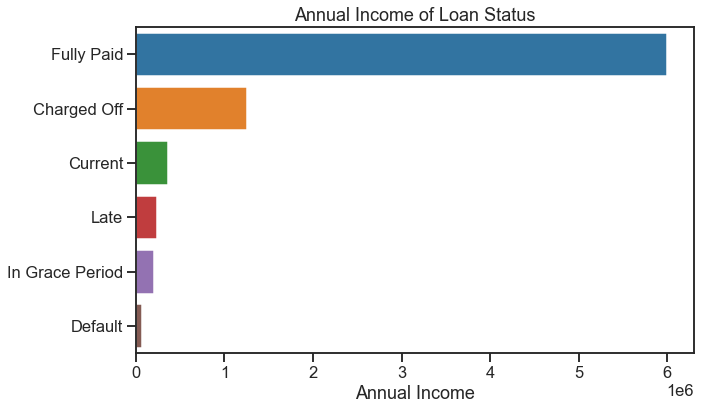

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(y='loan_status', x='annual_inc', data=loan_df.groupby('loan_status')['annual_inc'].max().sort_values(ascending=False).reset_index())
plt.title('Annual Income of Loan Status')
plt.ylabel('')
plt.xlabel('Annual Income')
plt.show()

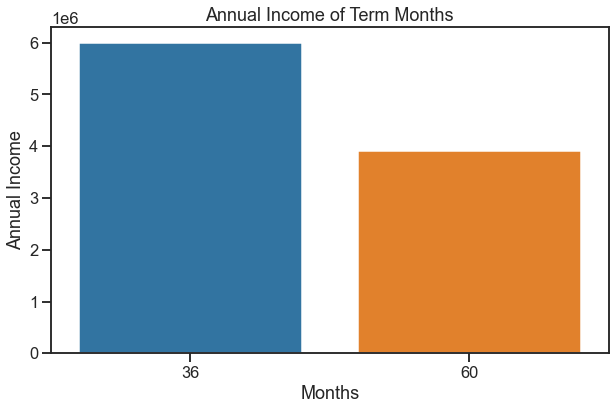

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='term_months', y='annual_inc', data=loan_df.groupby('term_months')['annual_inc'].max().sort_values(ascending=False).reset_index())
plt.title('Annual Income of Term Months')
plt.xlabel('Months')
plt.ylabel('Annual Income')
plt.show()

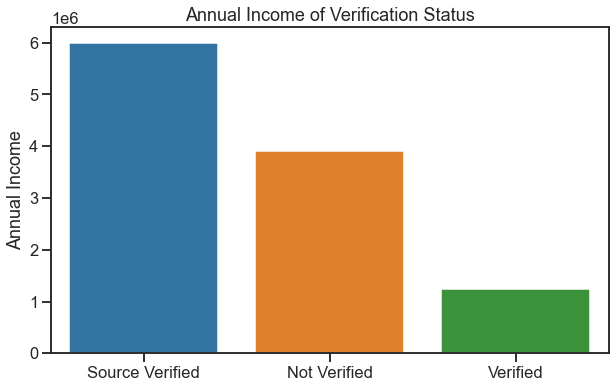

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='annual_inc', data=loan_df.groupby('verification_status')['annual_inc'].max().sort_values(ascending=False).reset_index())
plt.title('Annual Income of Verification Status')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

## Loan Amount

In [40]:
max_loan = loan_df['loan_amnt'].max()
min_loan = loan_df['loan_amnt'].min()
avg_loan = loan_df['loan_amnt'].mean()

print('Maximum Loan Ammount :',max_loan)
print('Minimum Loan Ammount :',min_loan)
print('Average Loan Ammount :',avg_loan)

Maximum Loan Ammount : 35000.0
Minimum Loan Ammount : 500.0
Average Loan Ammount : 11100.62234794908


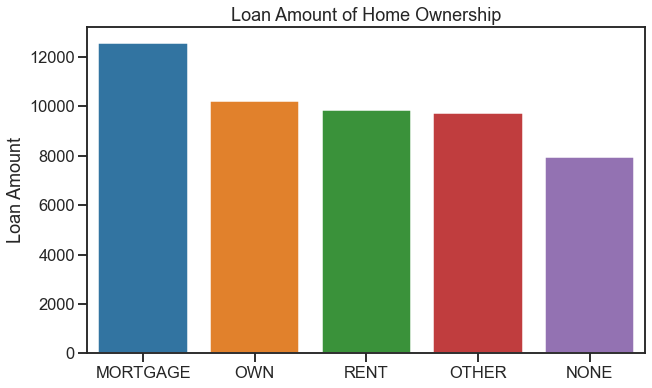

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='loan_amnt', data=loan_df.groupby('home_ownership')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('Loan Amount of Home Ownership')
plt.xlabel('')
plt.ylabel('Loan Amount')
plt.show()

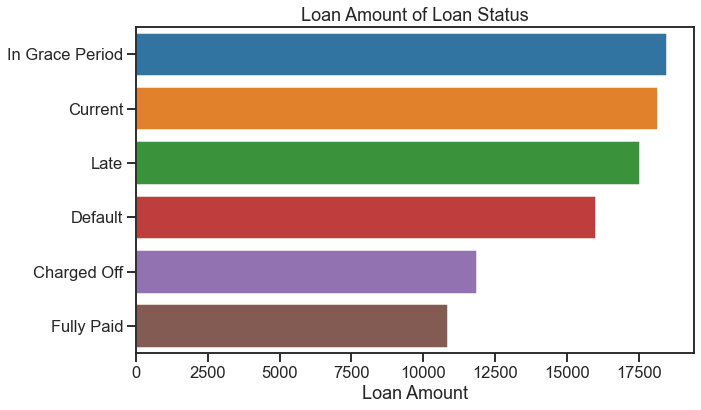

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(y='loan_status', x='loan_amnt', data=loan_df.groupby('loan_status')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('Loan Amount of Loan Status')
plt.ylabel('')
plt.xlabel('Loan Amount')
plt.show()

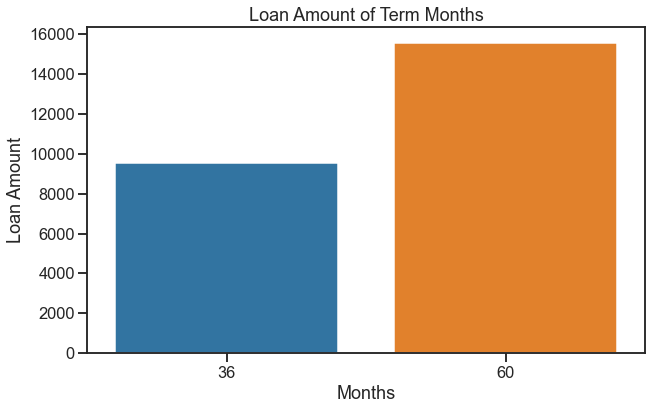

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='term_months', y='loan_amnt', data=loan_df.groupby('term_months')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('Loan Amount of Term Months')
plt.xlabel('Months')
plt.ylabel('Loan Amount')
plt.show()

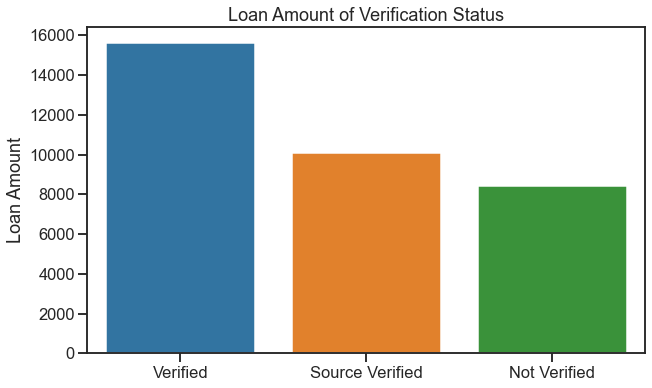

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='loan_amnt', data=loan_df.groupby('verification_status')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('Loan Amount of Verification Status')
plt.xlabel('')
plt.ylabel('Loan Amount')
plt.show()

## Installment

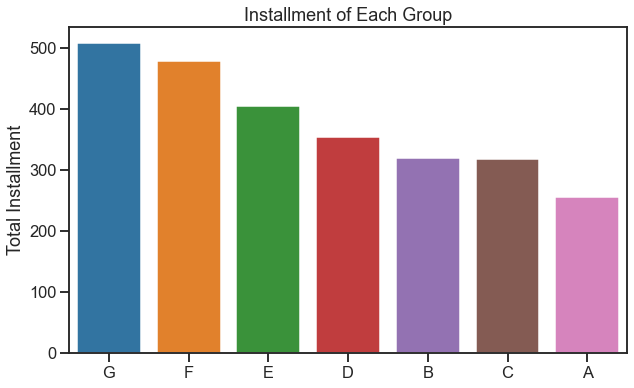

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='installment', data=loan_df.groupby('grade')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('Installment of Each Group')
plt.xlabel('')
plt.ylabel('Total Installment')
plt.show()

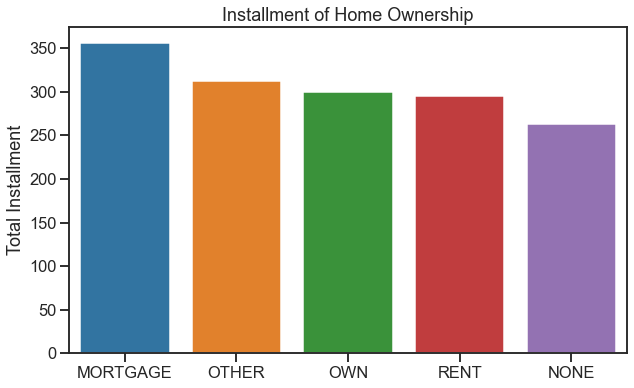

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='installment', data=loan_df.groupby('home_ownership')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('Installment of Home Ownership')
plt.xlabel('')
plt.ylabel('Total Installment')
plt.show()

## Interest Rate

In [47]:
max_int_rate = loan_df['int_rate_%'].max()
min_int_rate = loan_df['int_rate_%'].min()
avg_int_rate = loan_df['int_rate_%'].mean()

print('Maximum Interest Rate :',max_int_rate)
print('Minimum Interest Rate :',min_int_rate)
print('Average Interest Rate :',avg_int_rate)

Maximum Interest Rate : 24.59
Minimum Interest Rate : 5.42
Average Interest Rate : 12.163145685995962


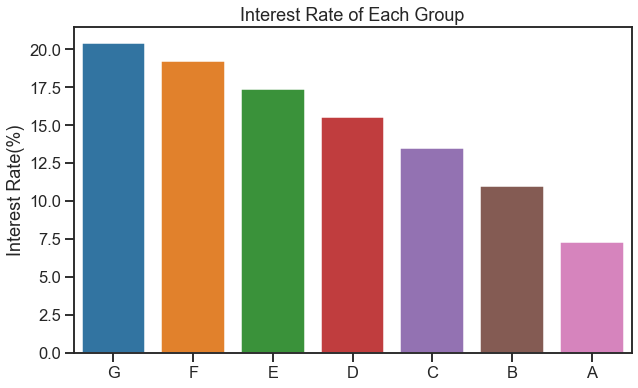

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='int_rate_%', data=loan_df.groupby('grade')['int_rate_%'].mean().sort_values(ascending=False).reset_index())
plt.title('Interest Rate of Each Group')
plt.xlabel('')
plt.ylabel('Interest Rate(%)')
plt.show()

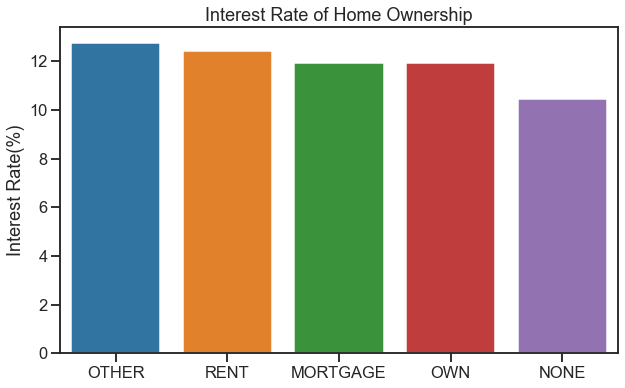

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='int_rate_%', data=loan_df.groupby('home_ownership')['int_rate_%'].mean().sort_values(ascending=False).reset_index())
plt.title('Interest Rate of Home Ownership')
plt.xlabel('')
plt.ylabel('Interest Rate(%)')
plt.show()

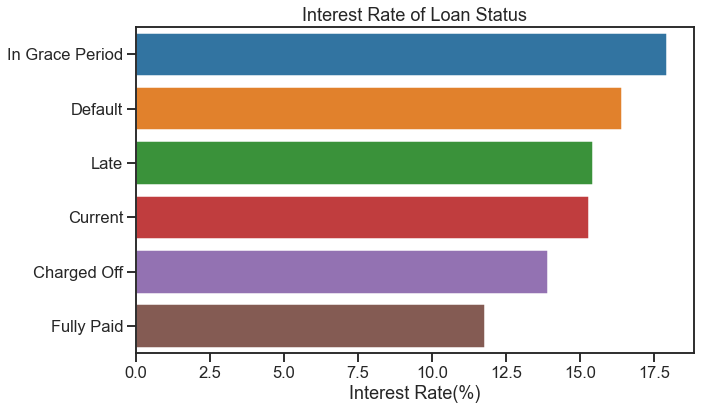

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(y='loan_status', x='int_rate_%', data=loan_df.groupby('loan_status')['int_rate_%'].mean().sort_values(ascending=False).reset_index())
plt.title('Interest Rate of Loan Status')
plt.ylabel('')
plt.xlabel('Interest Rate(%)')
plt.show()

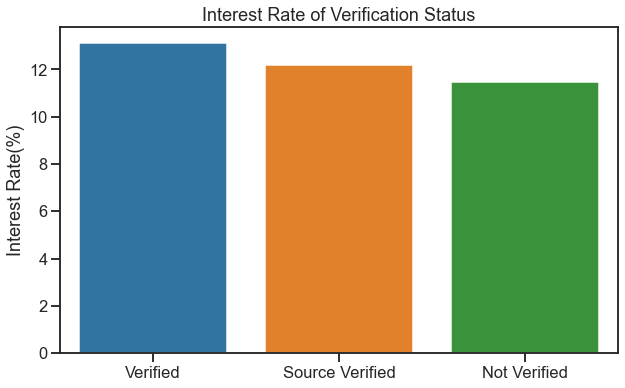

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='int_rate_%', data=loan_df.groupby('verification_status')['int_rate_%'].mean().sort_values(ascending=False).reset_index())
plt.title('Interest Rate of Verification Status')
plt.xlabel('')
plt.ylabel('Interest Rate(%)')
plt.show()

## Scatter Plot Function

In [52]:
def relation_plot(x_col, y_col, x_label, y_label, title):
    plt.figure(figsize=(16,10))
    sns.set_context('talk')

    plt.subplot(2,2,1)
    plt.suptitle(title)
    sns.scatterplot(x=x_col, y=y_col, hue='grade', data=loan_df)
    plt.xlabel('')
    plt.ylabel(y_label)

    plt.subplot(2,2,2)
    sns.scatterplot(x=x_col, y=y_col, hue='home_ownership', data=loan_df)
    plt.xlabel('')
    plt.ylabel('')

    plt.subplot(2,2,3)
    sns.scatterplot(x=x_col, y=y_col, hue='loan_status', data=loan_df)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.subplot(2,2,4)
    sns.scatterplot(x=x_col, y=y_col, hue='verification_status', data=loan_df)
    plt.xlabel(x_label)
    plt.ylabel('')

    plt.show()

## Annual Income vs Loan Amount

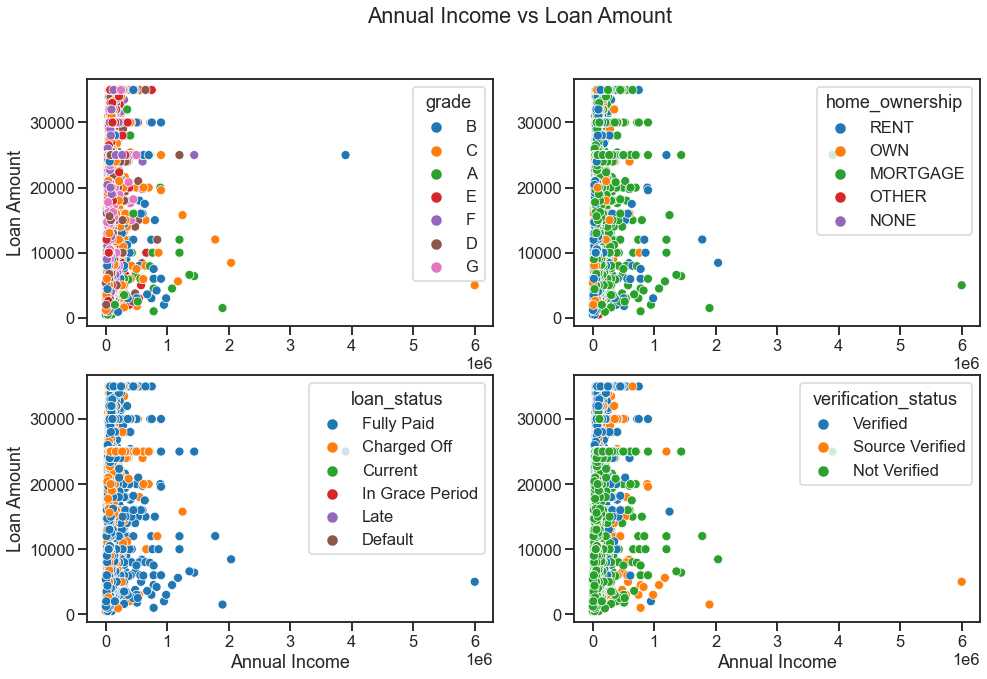

In [53]:
relation_plot(x_col='annual_inc',
              y_col='loan_amnt',
              x_label='Annual Income',
              y_label='Loan Amount',
              title='Annual Income vs Loan Amount'
             )

## Loan Amount Vs Total Payment

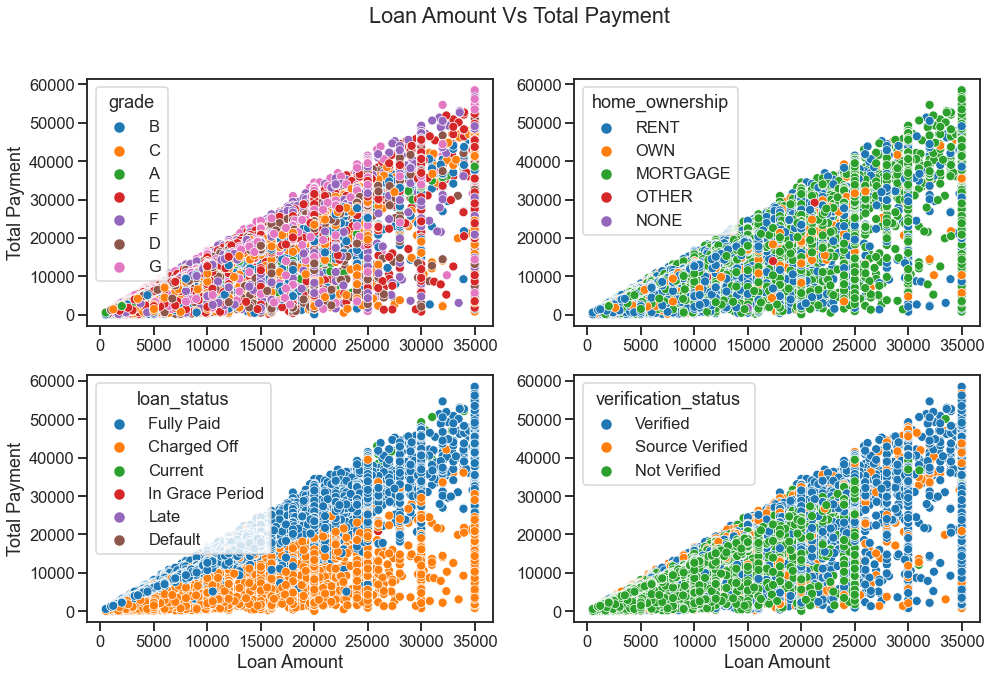

In [54]:
relation_plot(x_col='loan_amnt',
              y_col='total_pymnt',
              x_label='Loan Amount',
              y_label='Total Payment',
              title='Loan Amount Vs Total Payment'
             )

## Loan Amount Vs Funded Amount

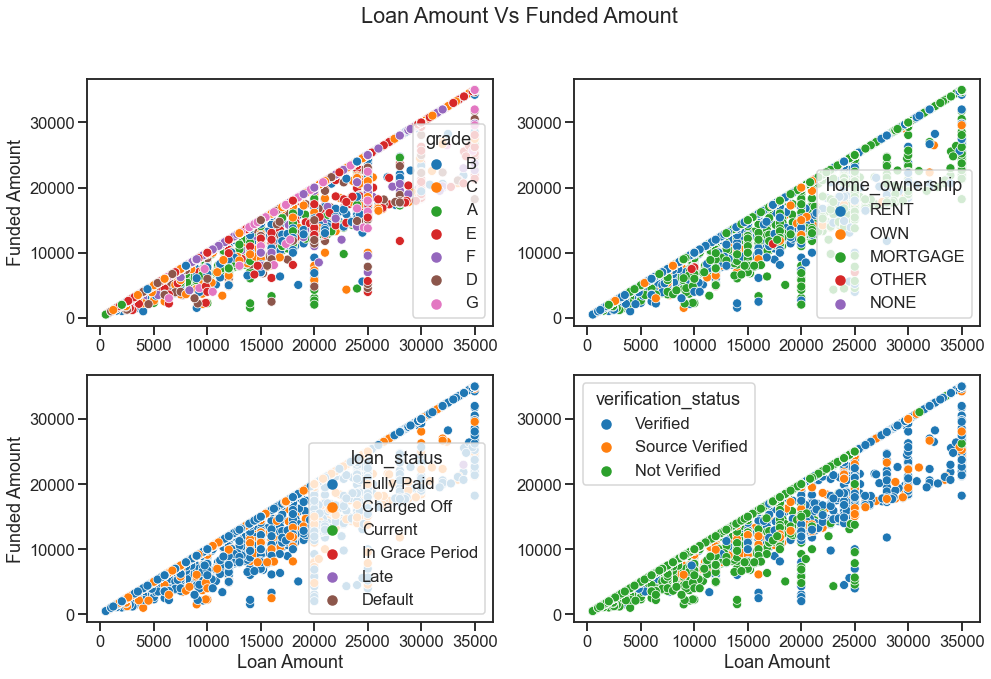

In [55]:
relation_plot(x_col='loan_amnt',
              y_col='funded_amnt',
              x_label='Loan Amount',
              y_label='Funded Amount',
              title='Loan Amount Vs Funded Amount'
             )

## Loan Amount Vs Installment

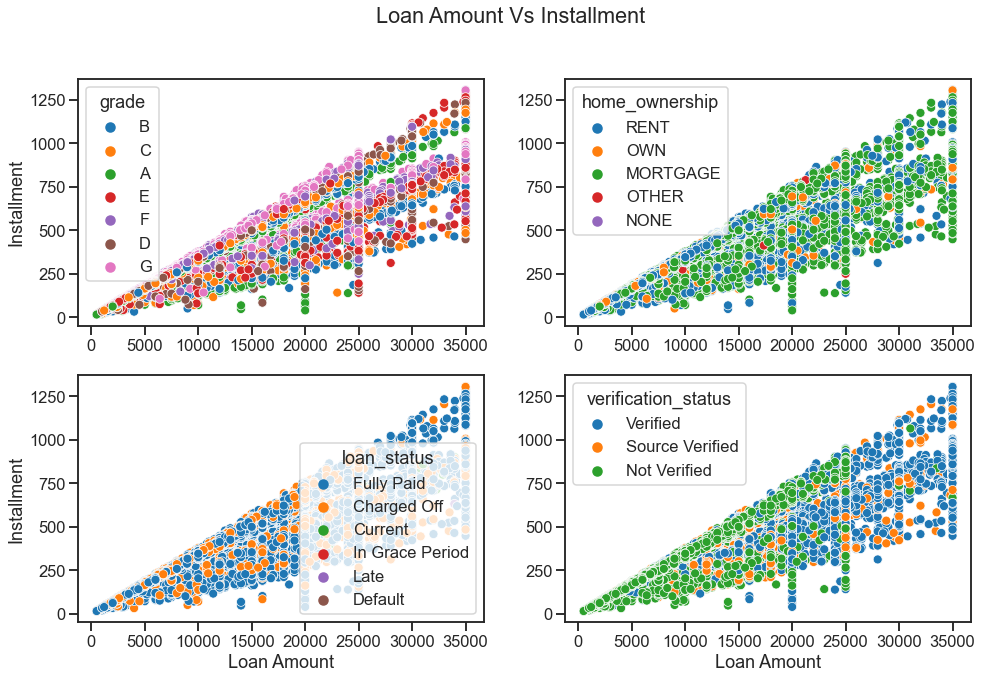

In [56]:
relation_plot(x_col='loan_amnt',
              y_col='installment',
              x_label='Loan Amount',
              y_label='Installment',
              title='Loan Amount Vs Installment'
             )

## Loan Amount Vs Interest Rate

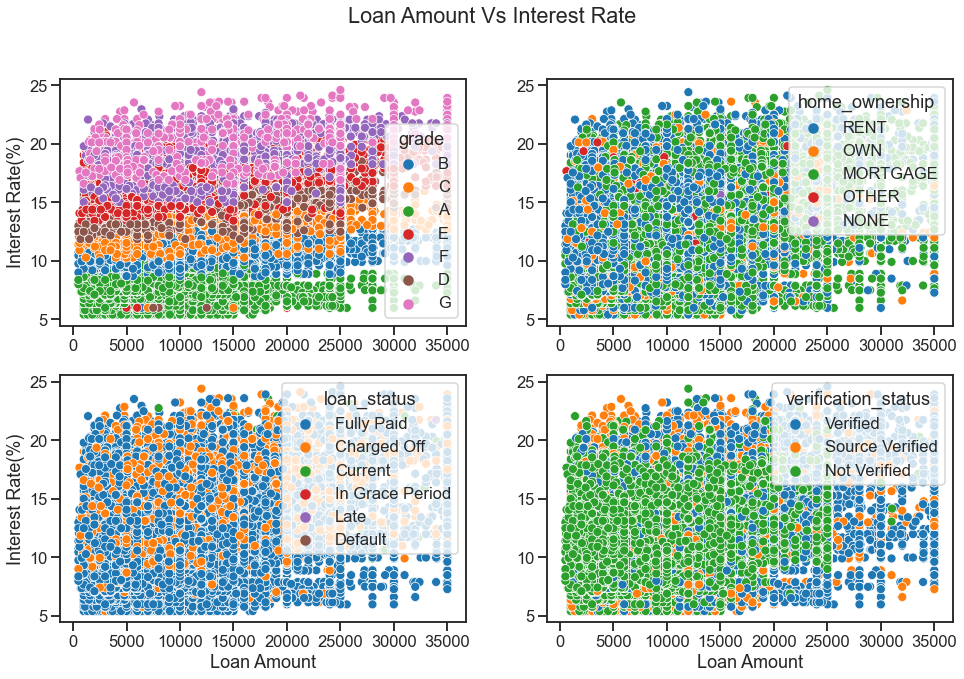

In [57]:
relation_plot(x_col='loan_amnt',
              y_col='int_rate_%',
              x_label='Loan Amount',
              y_label='Interest Rate(%)',
              title='Loan Amount Vs Interest Rate'
             )

## Total Payment Vs Total Recovery Principal

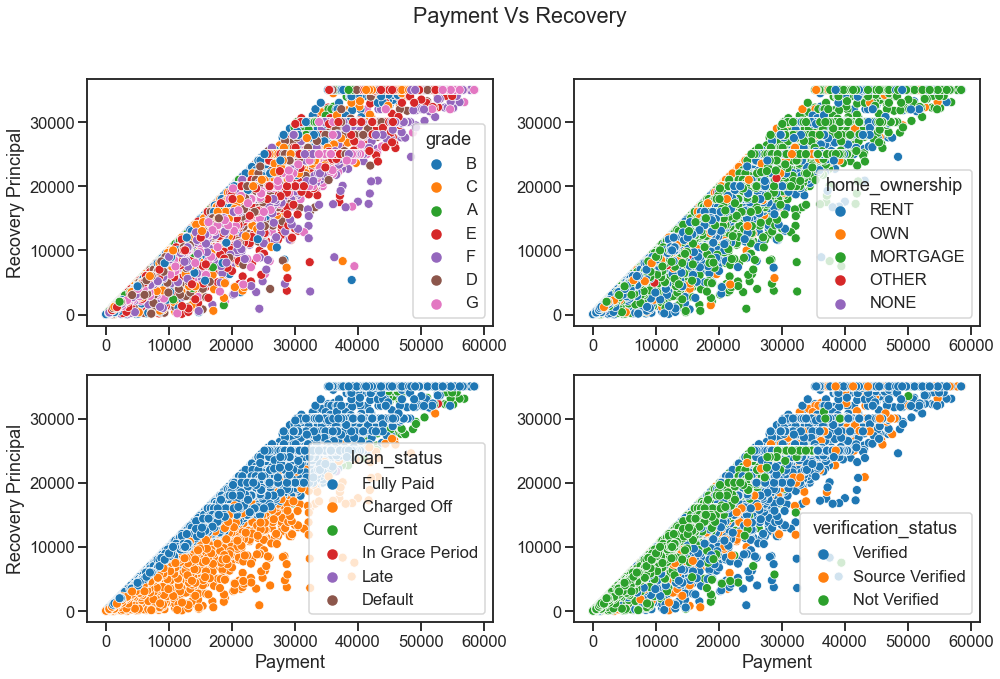

In [58]:
relation_plot(x_col='total_pymnt',
              y_col='total_rec_prncp',
              x_label='Payment',
              y_label='Recovery Principal',
              title='Payment Vs Recovery'
             )

## Total Payment Vs Total Recovery Late Fee

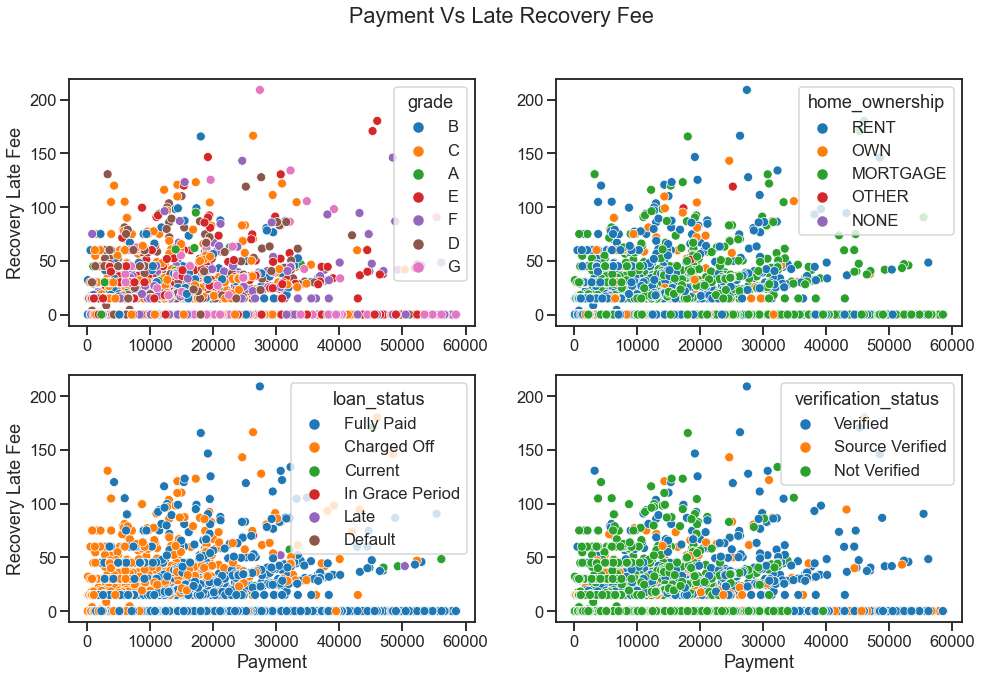

In [59]:
relation_plot(x_col='total_pymnt',
              y_col='total_rec_late_fee',
              x_label='Payment',
              y_label='Recovery Late Fee',
              title='Payment Vs Late Recovery Fee'
             )

## Total Payment Vs Recovery

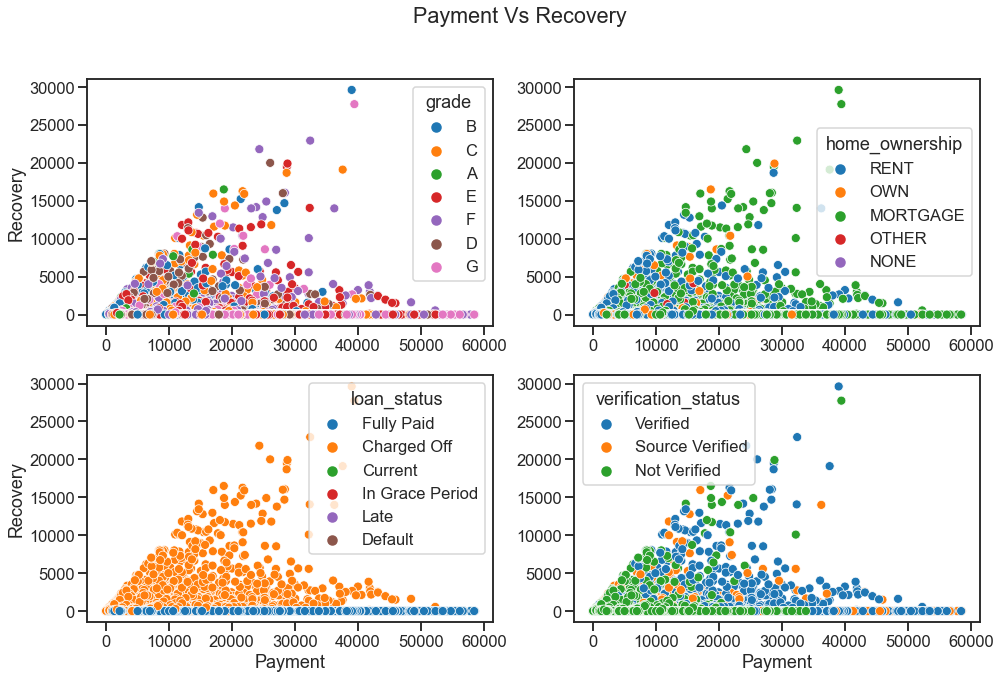

In [60]:
relation_plot(x_col='total_pymnt',
              y_col='recoveries',
              x_label='Payment',
              y_label='Recovery',
              title='Payment Vs Recovery'
             )

## Open Credit Lines vs Total Credit Lines

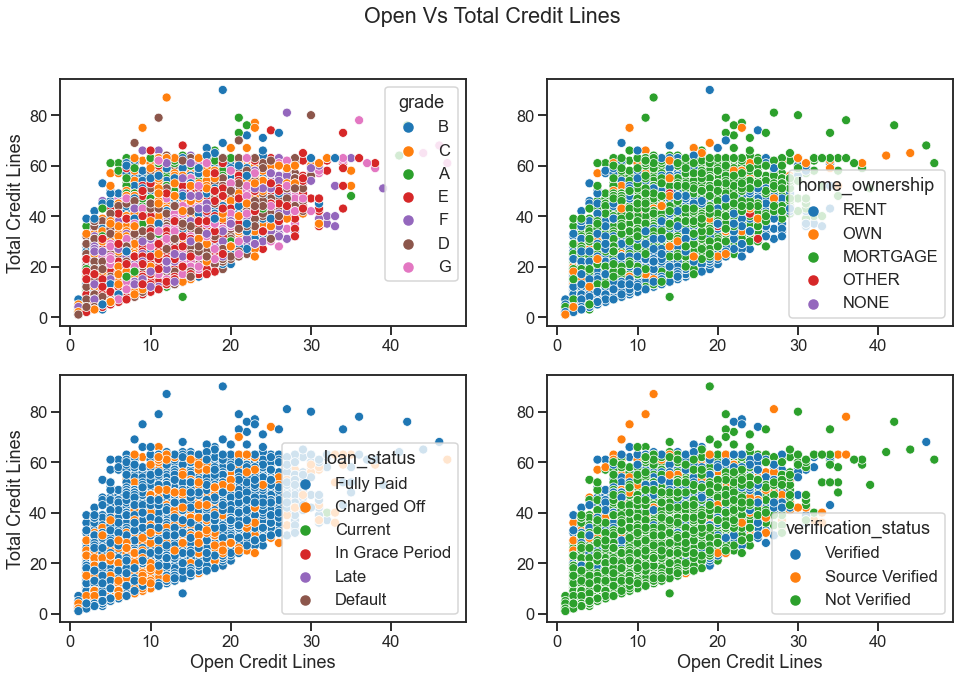

In [61]:
relation_plot(x_col='open_acc',
              y_col='total_acc',
              x_label='Open Credit Lines',
              y_label='Total Credit Lines',
              title='Open Vs Total Credit Lines'
             )

# Time Series Forecasting

In [62]:
month_year_cols = ['issue_d','last_pymnt_d','last_credit_pull_d']

In [63]:
for cols in month_year_cols:
    loan_df[cols] = pd.to_datetime(loan_df[cols])

In [64]:
loan_df['issue_d'].dt.year.unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [65]:
year_2007 = loan_df[loan_df['issue_d'].dt.year==2007]
year_2008 = loan_df[loan_df['issue_d'].dt.year==2008]
year_2009 = loan_df[loan_df['issue_d'].dt.year==2009]
year_2010 = loan_df[loan_df['issue_d'].dt.year==2010]
year_2011 = loan_df[loan_df['issue_d'].dt.year==2011]

## Average Loans In Each Months Of Year

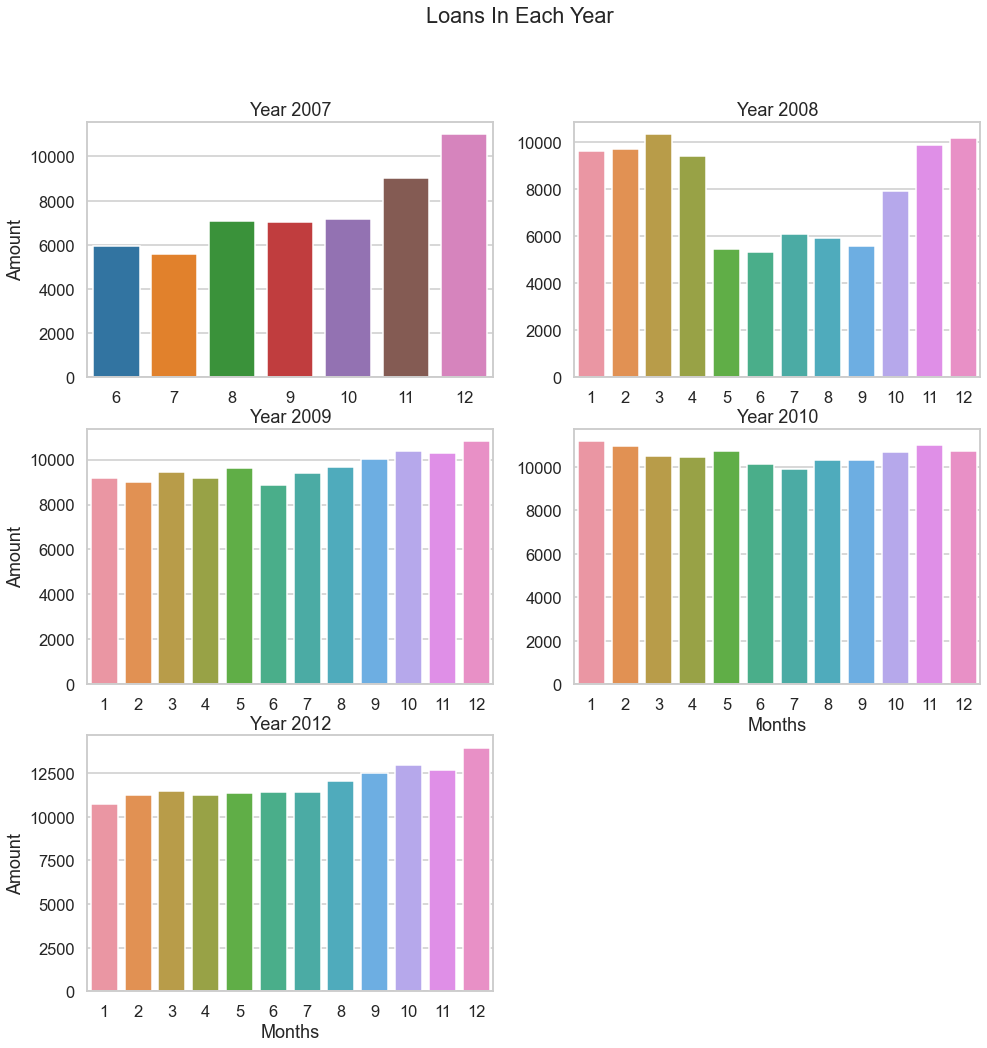

In [66]:
plt.figure(figsize=(16,16))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
plt.suptitle('Loans In Each Year')
sns.barplot(x='issue_d', y='loan_amnt', data=year_2007.groupby(loan_df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2007')
plt.xlabel('')
plt.ylabel('Amount')

plt.subplot(3,2,2)
sns.barplot(x='issue_d', y='loan_amnt', data=year_2008.groupby(loan_df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2008')
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,3)
sns.barplot(x='issue_d', y='loan_amnt', data=year_2009.groupby(loan_df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2009')
plt.xlabel('')
plt.ylabel('Amount')

plt.subplot(3,2,4)
sns.barplot(x='issue_d', y='loan_amnt', data=year_2010.groupby(loan_df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2010')
plt.xlabel('Months')
plt.ylabel('')

plt.subplot(3,2,5)
sns.barplot(x='issue_d', y='loan_amnt', data=year_2011.groupby(loan_df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2012')
plt.xlabel('Months')
plt.ylabel('Amount')

plt.show()

## Loans In Each Year

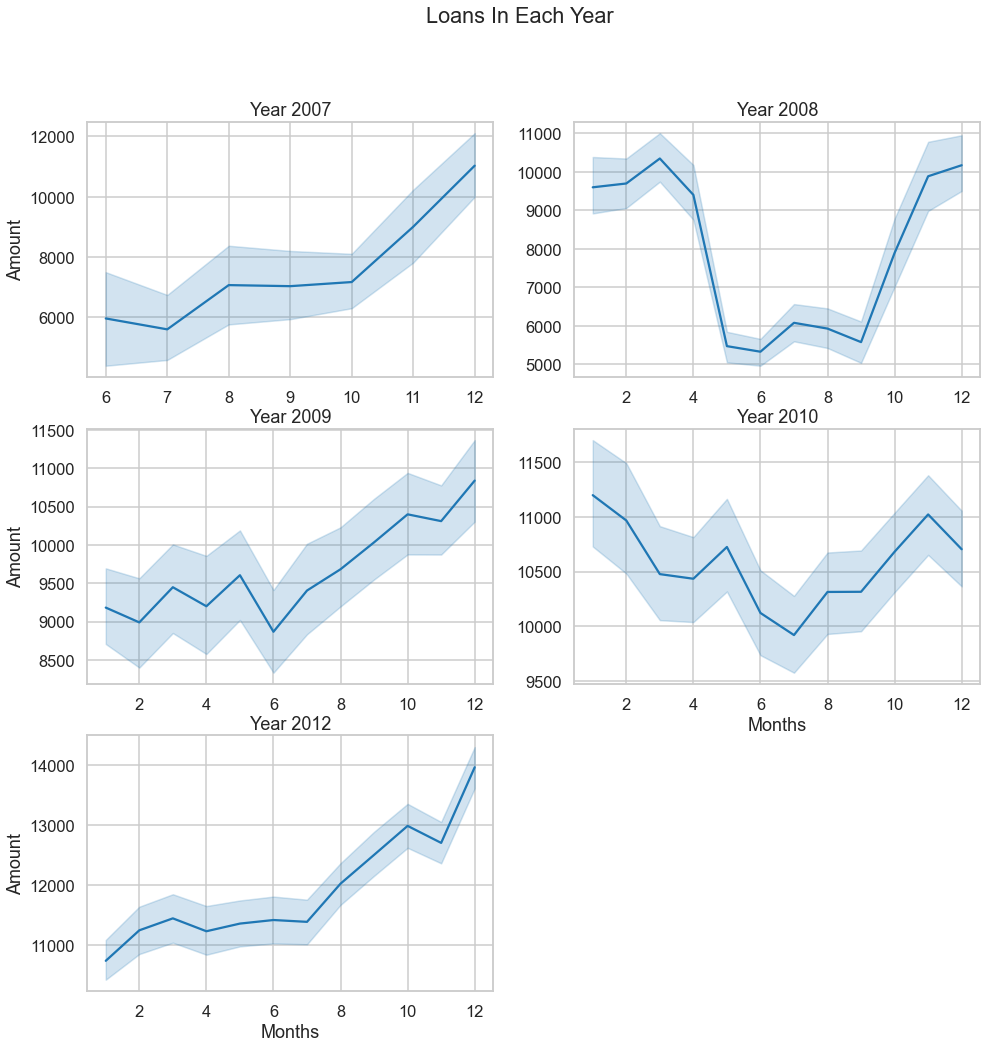

In [67]:
plt.figure(figsize=(16,16))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
plt.suptitle('Loans In Each Year')
sns.lineplot(x=loan_df['issue_d'].dt.month, y='loan_amnt', data=year_2007)
plt.title('Year 2007')
plt.xlabel('')
plt.ylabel('Amount')

plt.subplot(3,2,2)
sns.lineplot(x=loan_df['issue_d'].dt.month, y='loan_amnt', data=year_2008)
plt.title('Year 2008')
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,3)
sns.lineplot(x=loan_df['issue_d'].dt.month, y='loan_amnt', data=year_2009)
plt.title('Year 2009')
plt.xlabel('')
plt.ylabel('Amount')

plt.subplot(3,2,4)
sns.lineplot(x=loan_df['issue_d'].dt.month, y='loan_amnt', data=year_2010)
plt.title('Year 2010')
plt.xlabel('Months')
plt.ylabel('')

plt.subplot(3,2,5)
sns.lineplot(x=loan_df['issue_d'].dt.month, y='loan_amnt', data=year_2011)
plt.title('Year 2012')
plt.xlabel('Months')
plt.ylabel('Amount')

plt.show()

## Loan Amount Forecasting

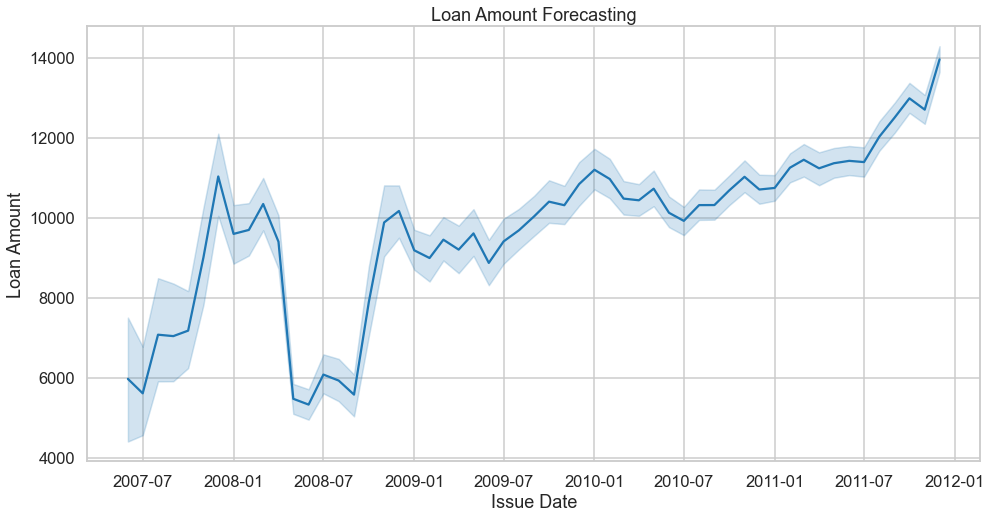

In [68]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.lineplot(x='issue_d', y='loan_amnt', data=loan_df)
plt.title('Loan Amount Forecasting')
plt.xlabel('Issue Date')
plt.ylabel('Loan Amount')
plt.show()

## Payment Amount Forecasting

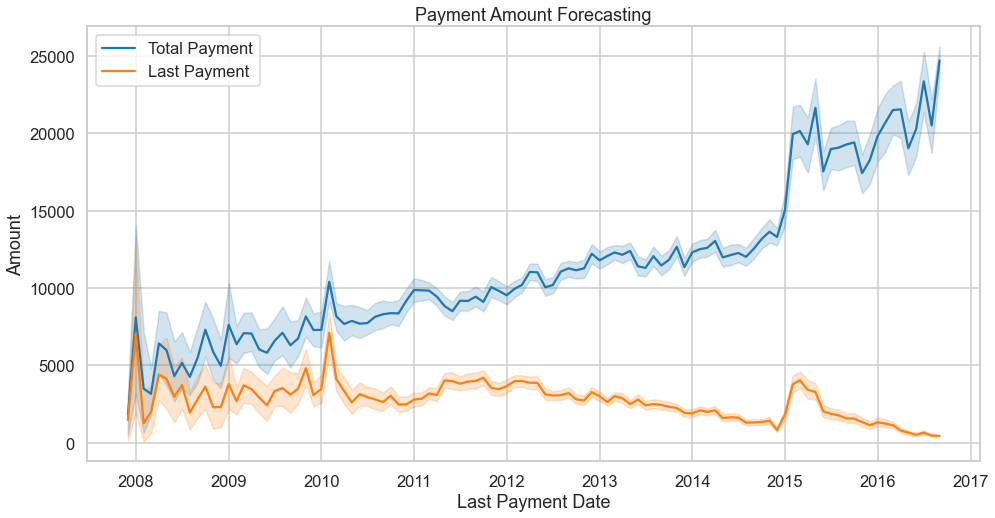

In [69]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.lineplot(x='last_pymnt_d', y='total_pymnt', data=loan_df)
sns.lineplot(x='last_pymnt_d', y='last_pymnt_amnt', data=loan_df)
plt.legend(['Total Payment','Last Payment'])
plt.title('Payment Amount Forecasting')
plt.xlabel('Last Payment Date')
plt.ylabel('Amount')
plt.show()

# Distribution of Numeric Data

## Annual Income

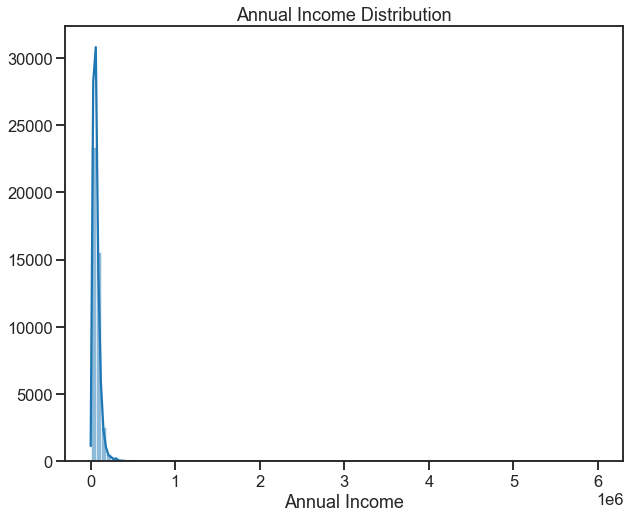

In [71]:
plt.figure(figsize=(10,8))
sns.set_style('ticks')
sns.histplot(x='annual_inc', data=loan_df, bins=100, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')
plt.show()

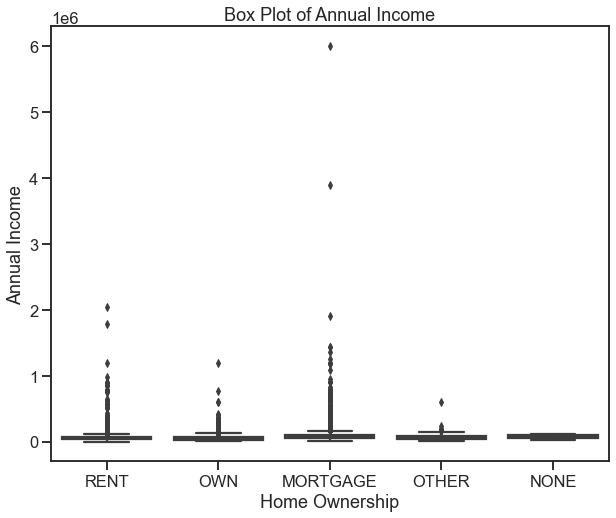

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(x='home_ownership', y='annual_inc', data=loan_df)
plt.title('Box Plot of Annual Income')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.show()

## Loan Amount

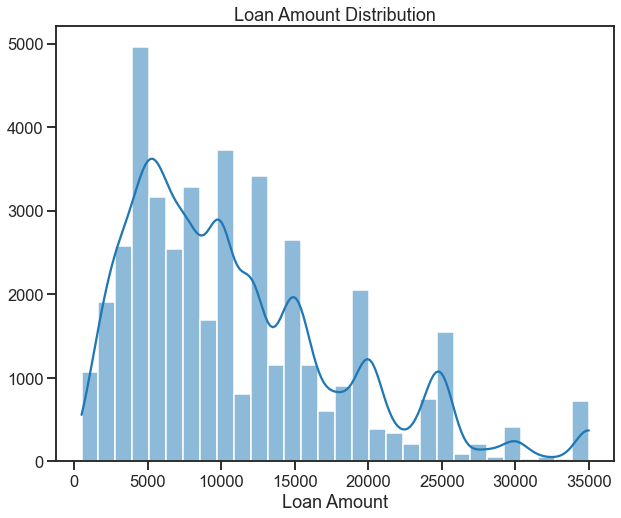

In [73]:
plt.figure(figsize=(10,8))
sns.set_style('ticks')
sns.histplot(x='loan_amnt', data=loan_df, bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('')
plt.show()

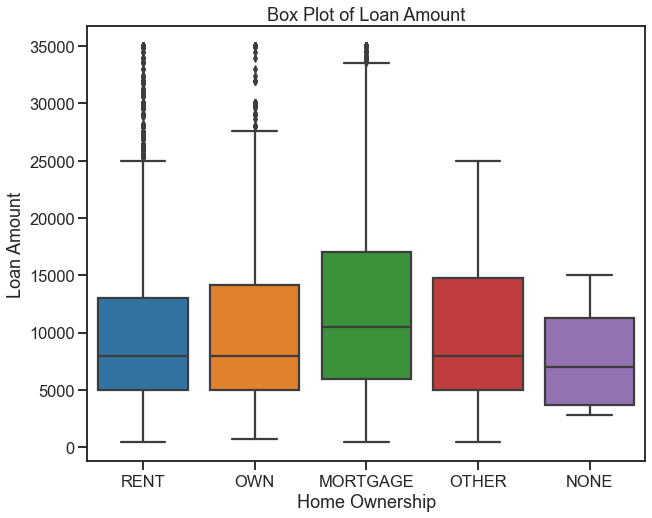

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot(x='home_ownership', y='loan_amnt', data=loan_df)
plt.title('Box Plot of Loan Amount')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

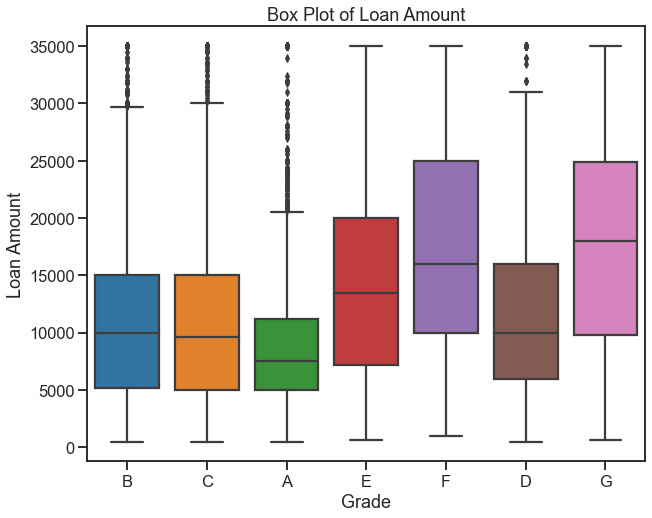

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(x='grade', y='loan_amnt', data=loan_df)
plt.title('Box Plot of Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

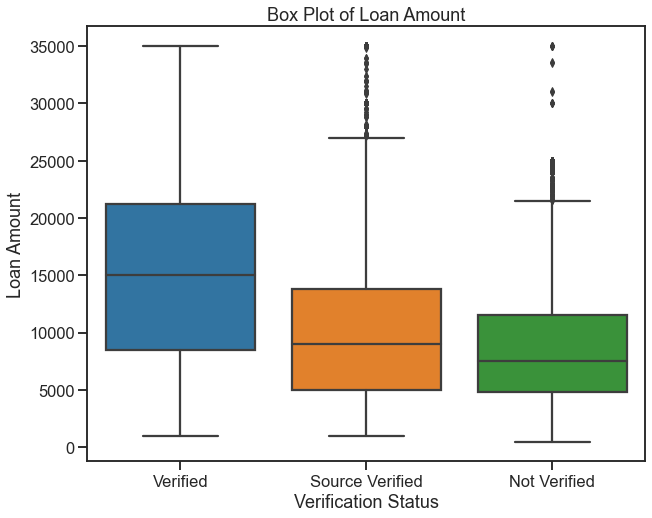

In [76]:
plt.figure(figsize=(10,8))
sns.boxplot(x='verification_status', y='loan_amnt', data=loan_df)
plt.title('Box Plot of Loan Amount')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.show()

## Funded Amount

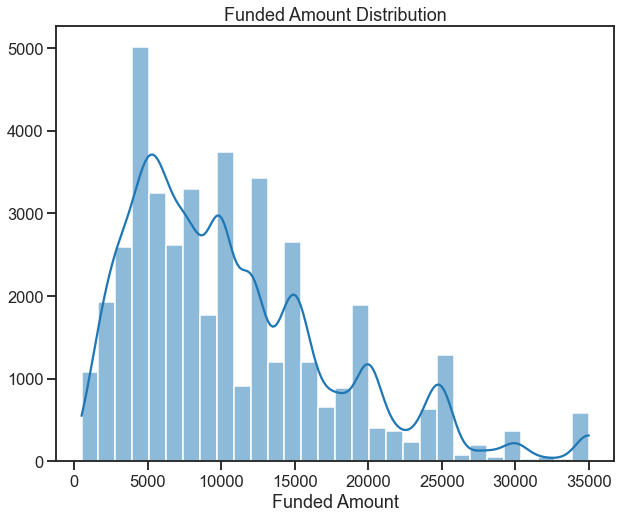

In [77]:
plt.figure(figsize=(10,8))
sns.histplot(x='funded_amnt', data=loan_df, bins=30, kde=True)
plt.title('Funded Amount Distribution')
plt.xlabel('Funded Amount')
plt.ylabel('')
plt.show()

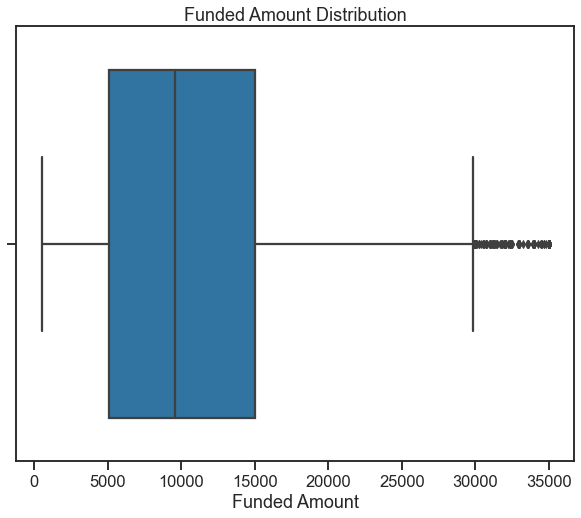

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x='funded_amnt', data=loan_df)
plt.title('Funded Amount Distribution')
plt.xlabel('Funded Amount')
plt.ylabel('')
plt.show()

## Installment

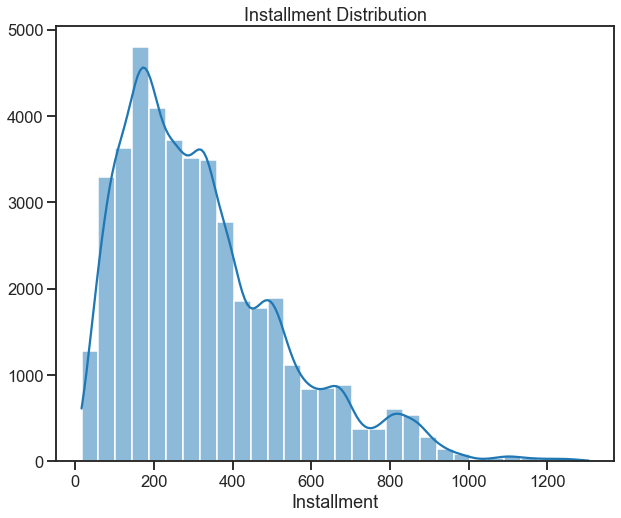

In [79]:
plt.figure(figsize=(10,8))
sns.histplot(x='installment', data=loan_df, bins=30, kde=True)
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.ylabel('')
plt.show()

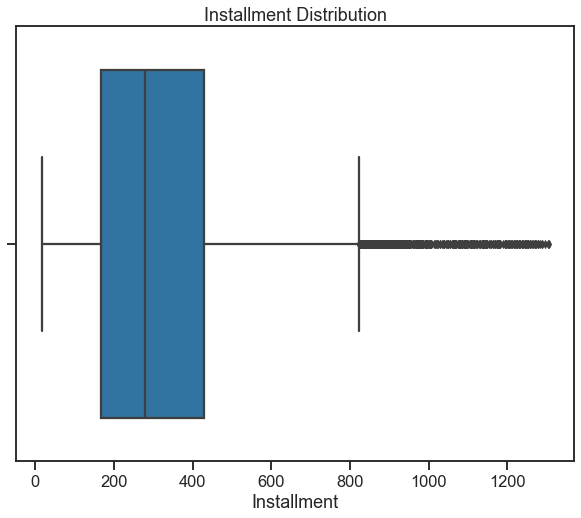

In [80]:
plt.figure(figsize=(10,8))
sns.boxplot(x='installment', data=loan_df)
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.ylabel('')
plt.show()

## 'dti' Ratio Distribution

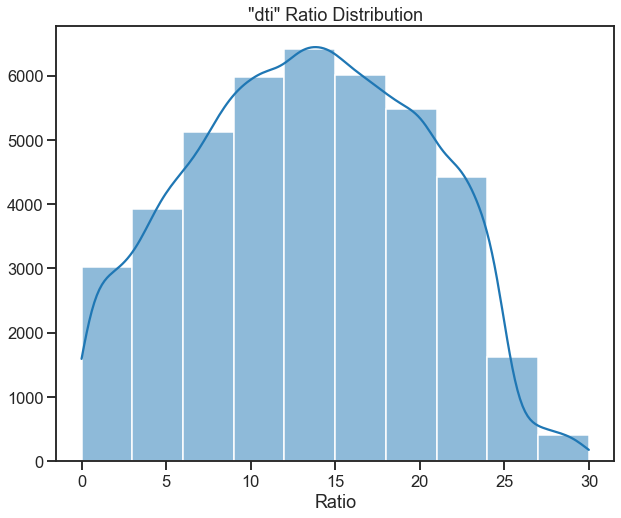

In [81]:
plt.figure(figsize=(10,8))
sns.histplot(x='dti', data=loan_df, bins=10, kde=True)
plt.title('"dti" Ratio Distribution')
plt.xlabel('Ratio')
plt.ylabel('')
plt.show()

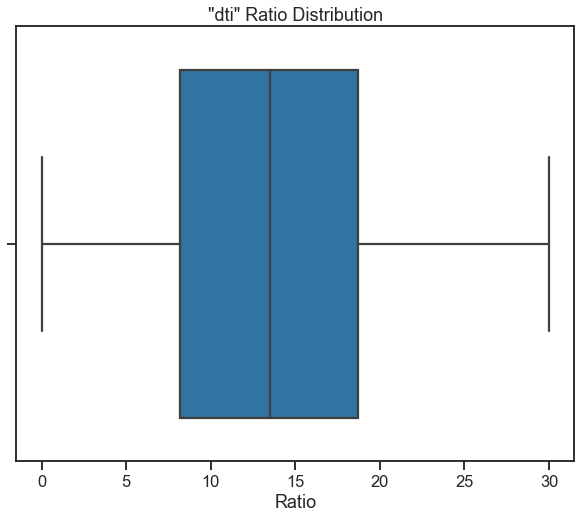

In [82]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dti', data=loan_df)
plt.title('"dti" Ratio Distribution')
plt.xlabel('Ratio')
plt.ylabel('')
plt.show()

## Fico Range Distribution

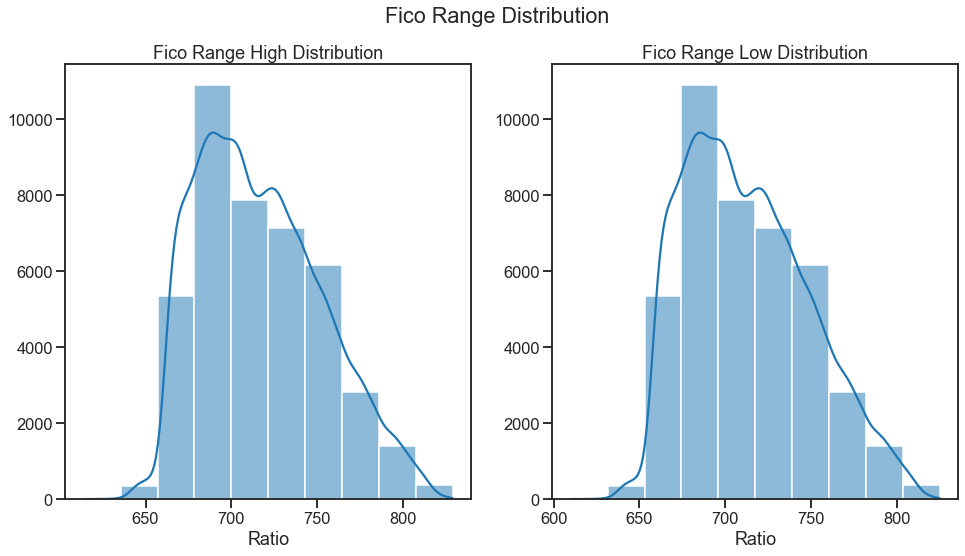

In [83]:
plt.figure(figsize=(16,8))

plt.suptitle('Fico Range Distribution')
plt.subplot(1,2,1)
sns.histplot(x='fico_range_high', data=loan_df, bins=10, kde=True)
plt.title('Fico Range High Distribution')
plt.xlabel('Ratio')
plt.ylabel('')

plt.subplot(1,2,2)
sns.histplot(x='fico_range_low', data=loan_df, bins=10, kde=True)
plt.title('Fico Range Low Distribution')
plt.xlabel('Ratio')
plt.ylabel('')
plt.show()

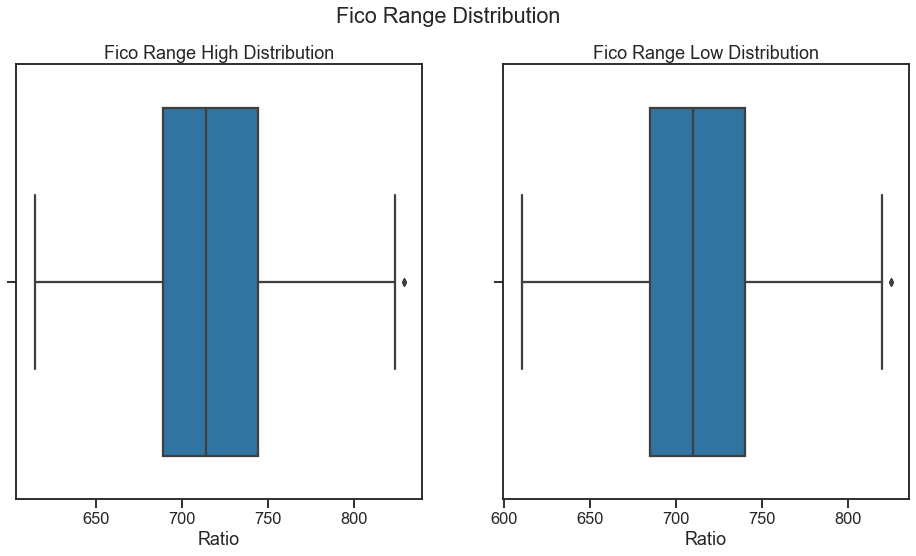

In [84]:
plt.figure(figsize=(16,8))

plt.suptitle('Fico Range Distribution')
plt.subplot(1,2,1)
sns.boxplot(x='fico_range_high', data=loan_df)
plt.title('Fico Range High Distribution')
plt.xlabel('Ratio')
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(x='fico_range_low', data=loan_df)
plt.title('Fico Range Low Distribution')
plt.xlabel('Ratio')
plt.ylabel('')
plt.show()

## Open Credit Lines

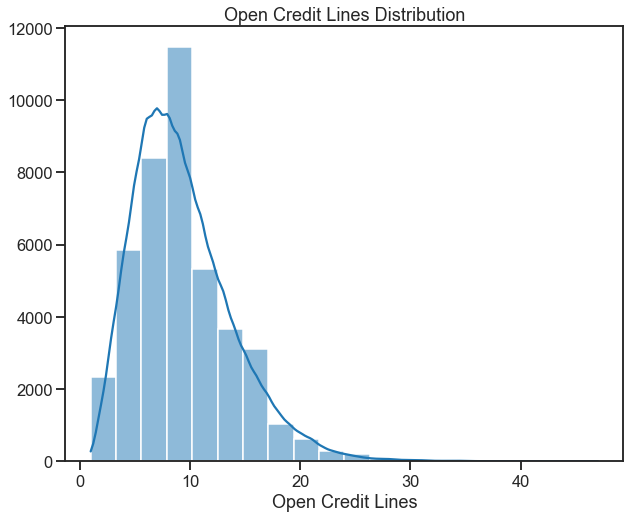

In [85]:
plt.figure(figsize=(10,8))
sns.histplot(x='open_acc', data=loan_df, bins=20, kde=True)
plt.title('Open Credit Lines Distribution')
plt.xlabel('Open Credit Lines')
plt.ylabel('')
plt.show()

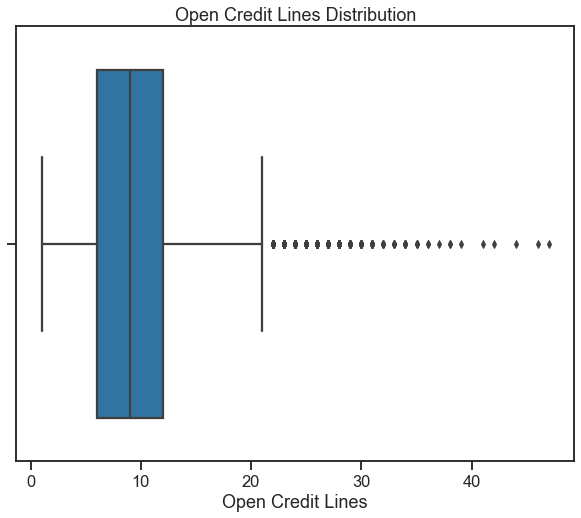

In [86]:
plt.figure(figsize=(10,8))
sns.boxplot(x='open_acc', data=loan_df)
plt.title('Open Credit Lines Distribution')
plt.xlabel('Open Credit Lines')
plt.ylabel('')
plt.show()

## Total Credit Lines

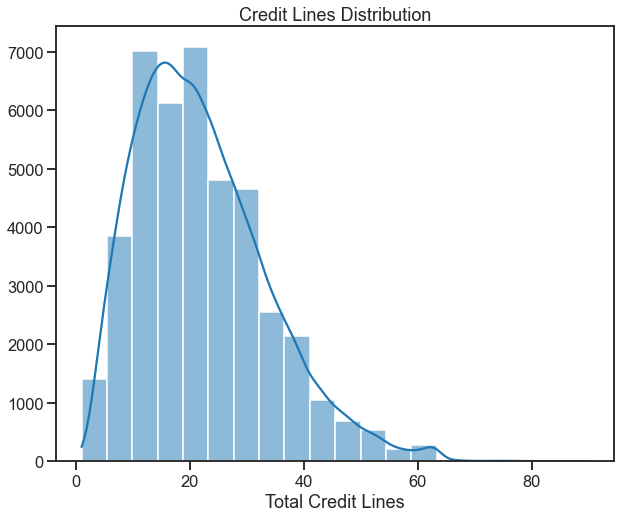

In [87]:
plt.figure(figsize=(10,8))
sns.histplot(x='total_acc', data=loan_df, bins=20, kde=True)
plt.title('Credit Lines Distribution')
plt.xlabel('Total Credit Lines')
plt.ylabel('')
plt.show()

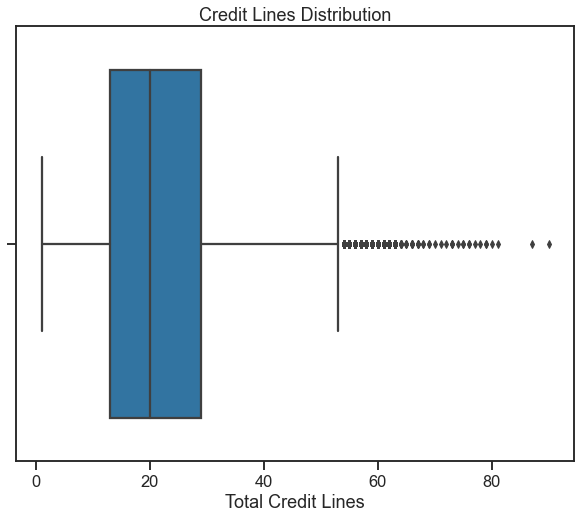

In [88]:
plt.figure(figsize=(10,8))
sns.boxplot(x='total_acc', data=loan_df)
plt.title('Credit Lines Distribution')
plt.xlabel('Total Credit Lines')
plt.ylabel('')
plt.show()

## Total Payment Distribution

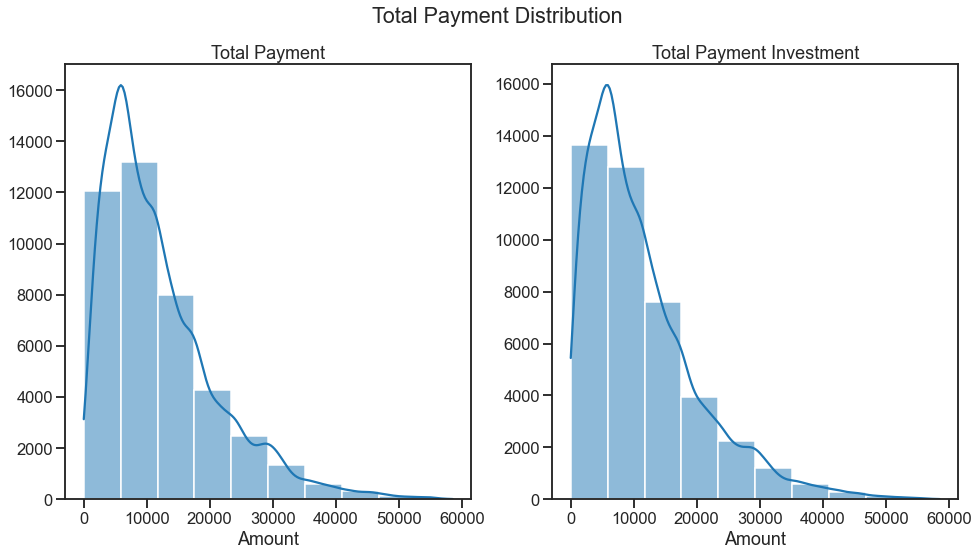

In [89]:
plt.figure(figsize=(16,8))

plt.suptitle('Total Payment Distribution')
plt.subplot(1,2,1)
sns.histplot(x='total_pymnt', data=loan_df, bins=10, kde=True)
plt.title('Total Payment')
plt.xlabel('Amount')
plt.ylabel('')

plt.subplot(1,2,2)
sns.histplot(x='total_pymnt_inv', data=loan_df, bins=10, kde=True)
plt.title('Total Payment Investment')
plt.xlabel('Amount')
plt.ylabel('')
plt.show()

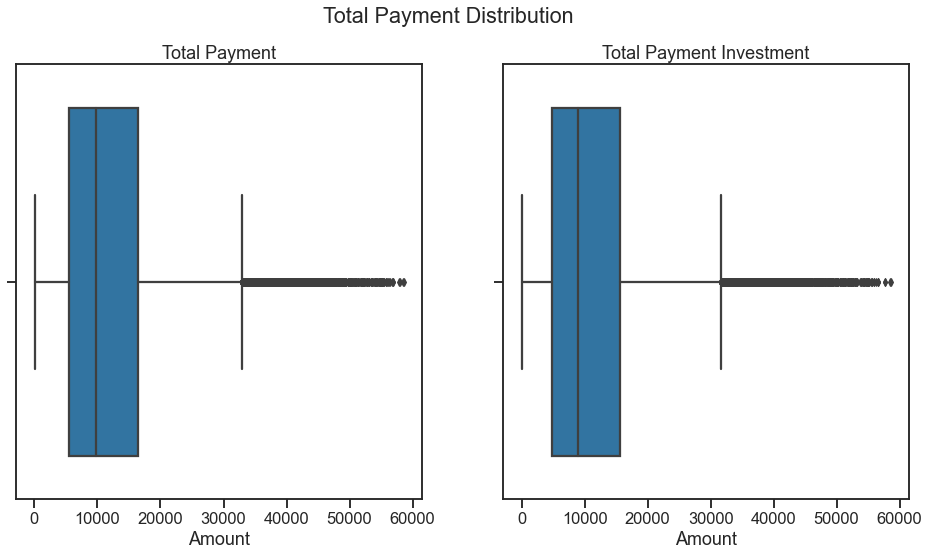

In [90]:
plt.figure(figsize=(16,8))

plt.suptitle('Total Payment Distribution')
plt.subplot(1,2,1)
sns.boxplot(x='total_pymnt', data=loan_df)
plt.title('Total Payment')
plt.xlabel('Amount')
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(x='total_pymnt_inv', data=loan_df)
plt.title('Total Payment Investment')
plt.xlabel('Amount')
plt.ylabel('')
plt.show()

## Total Recovery Distribution

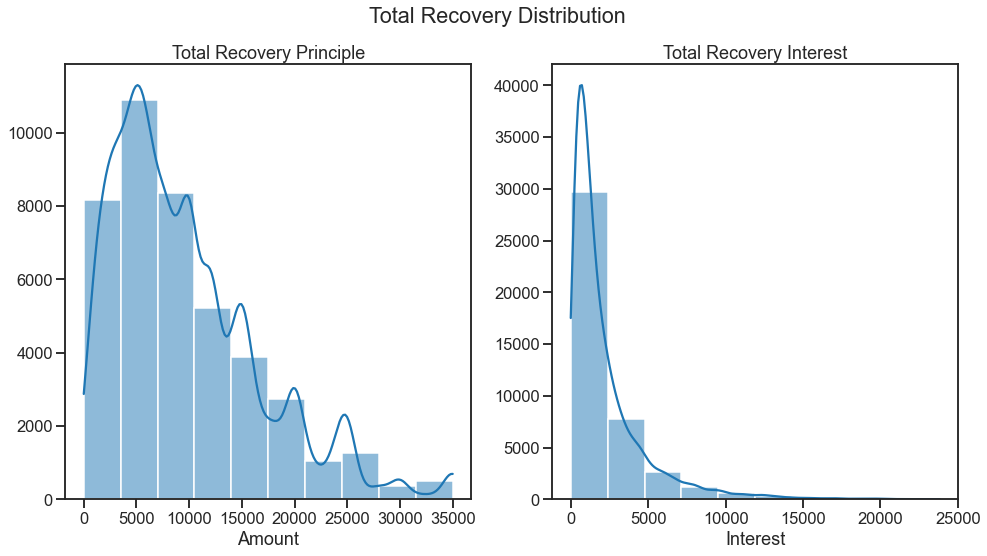

In [91]:
plt.figure(figsize=(16,8))

plt.suptitle('Total Recovery Distribution')
plt.subplot(1,2,1)
sns.histplot(x='total_rec_prncp', data=loan_df, bins=10, kde=True)
plt.title('Total Recovery Principle')
plt.xlabel('Amount')
plt.ylabel('')

plt.subplot(1,2,2)
sns.histplot(x='total_rec_int', data=loan_df, bins=10, kde=True)
plt.title('Total Recovery Interest')
plt.xlabel('Interest')
plt.ylabel('')
plt.show()

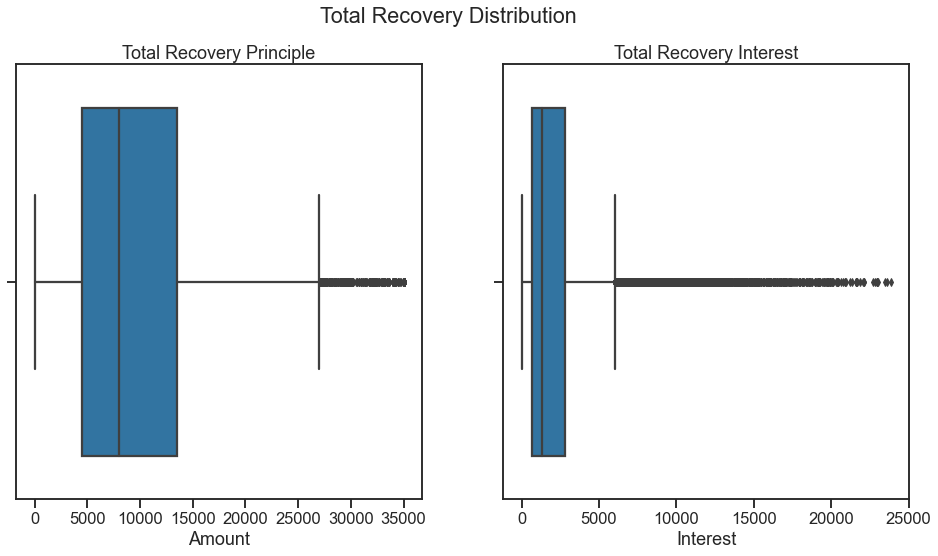

In [92]:
plt.figure(figsize=(16,8))

plt.suptitle('Total Recovery Distribution')
plt.subplot(1,2,1)
sns.boxplot(x='total_rec_prncp', data=loan_df)
plt.title('Total Recovery Principle')
plt.xlabel('Amount')
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(x='total_rec_int', data=loan_df)
plt.title('Total Recovery Interest')
plt.xlabel('Interest')
plt.ylabel('')
plt.show()

## Interest Rate Distribution

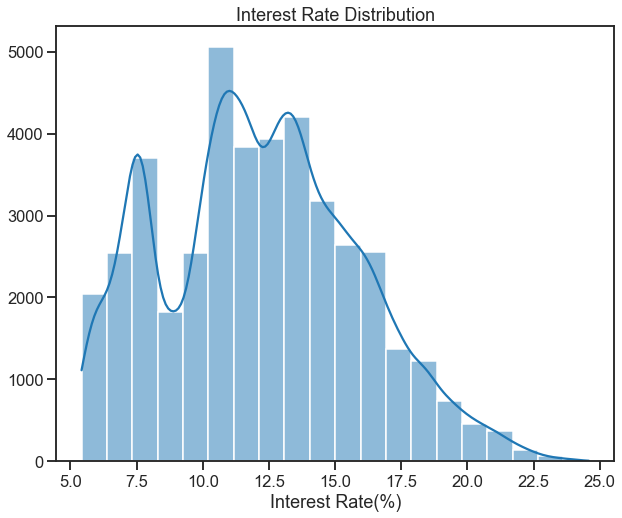

In [93]:
plt.figure(figsize=(10,8))
sns.histplot(x='int_rate_%', data=loan_df, bins=20, kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate(%)')
plt.ylabel('')
plt.show()

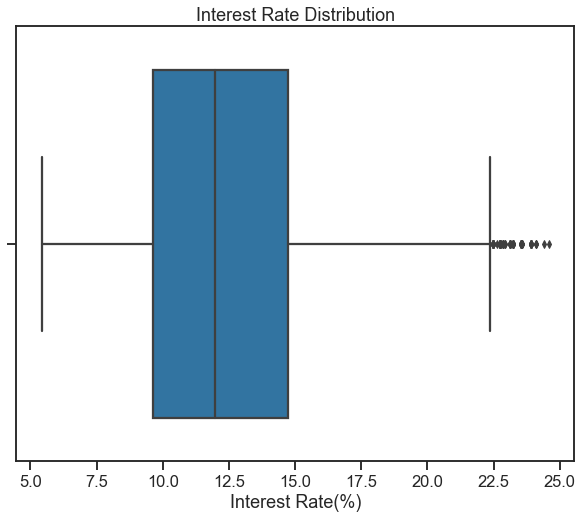

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(x='int_rate_%', data=loan_df)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate(%)')
plt.ylabel('')
plt.show()

## Revolving line utilization rate

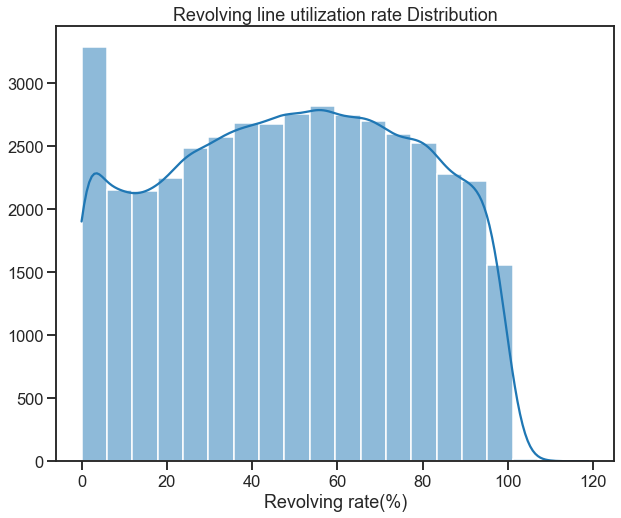

In [95]:
plt.figure(figsize=(10,8))
sns.histplot(x='revol_util_%', data=loan_df, bins=20, kde=True)
plt.title('Revolving line utilization rate Distribution')
plt.xlabel('Revolving rate(%)')
plt.ylabel('')
plt.show()

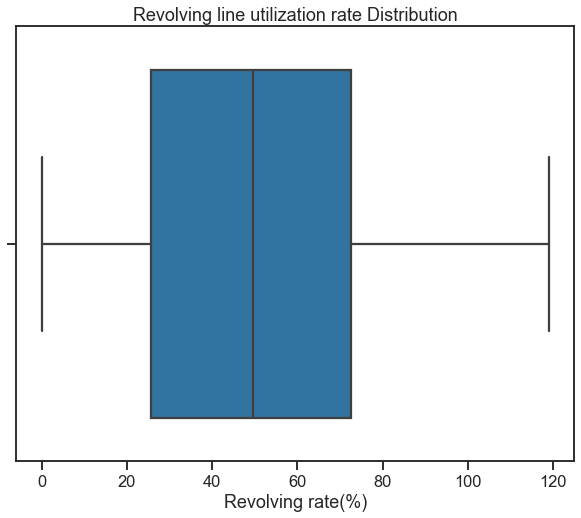

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(x='revol_util_%', data=loan_df)
plt.title('Revolving line utilization rate Distribution')
plt.xlabel('Revolving rate(%)')
plt.ylabel('')
plt.show()